<a href="https://colab.research.google.com/github/Mahendhar-Saratha/DiagonalCrossGeneration/blob/main/MDCG_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Multimodal Diagonal Cross-Generation** <br>
**Mahendhar Saratha**


This project aims to develop a deep learning model that effectively integrates and learns from multimodal biological data—specifically RNA sequencing data and antibody-derived tags (ADT). The ultimate goal is to predict ADT outputs based on RNA inputs, which can have significant implications in understanding cellular functions and interactions in biological research.

I implemented a variational autoencoder (VAE) architecture, which includes separate encoders and decoders for RNA and ADT data modalities. The encoders transform the input data into a latent space representation, capturing the essential features of each modality. The decoders then attempt to reconstruct the original input from these latent space representations.

Below facilitates the integration of Google Drive within the Google Colab environment

In [ ]:
from google.colab import drive

# Mounting Google Drive to the Colab environment
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing nessesary libraries for implementing Variational Auto Encoder

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

Loading datasets <br>

RNA modality train data : This contains (5000 samples, 10000 features) for RNA data<br>
ADT modality train data : This contains (5000 samples, 25 features) for ADT data<br>
RNA modality test data  : This contains (5000 samples, 10000 features) for ADT data <br>

In [ ]:
train_rna = pd.read_csv('/content/drive/MyDrive/Kaggle4/train_RNA.csv',skiprows=1, header=None)
test_rna = pd.read_csv('/content/drive/MyDrive/Kaggle4/test_RNA.csv',skiprows=1, header=None)
train_adt = pd.read_csv('/content/drive/MyDrive/Kaggle4/train_ADT.csv',skiprows=1, header=None)
eval_rna = pd.read_csv('/content/drive/MyDrive/Kaggle4/eval_RNA.csv',skiprows=1, header=None)
eval_adt = pd.read_csv('/content/drive/MyDrive/Kaggle4/eval_ADT.csv',skiprows=1, header=None)

Nomarlizing the datasets

In [ ]:
# Normalize data
scaler_rna = StandardScaler()
scaler_adt = StandardScaler()

train_rna_scaled = scaler_rna.fit_transform(train_rna)
train_adt_scaled = scaler_adt.fit_transform(train_adt)
test_rna_scaled = scaler_rna.transform(test_rna)

# Convert to PyTorch tensors
train_rna_tensor = torch.tensor(train_rna_scaled, dtype=torch.float32)
train_adt_tensor = torch.tensor(train_adt_scaled, dtype=torch.float32)
test_rna_tensor = torch.tensor(test_rna_scaled, dtype=torch.float32)

# Create dataloaders
train_dataset = TensorDataset(train_rna_tensor.T, train_adt_tensor.T)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

**Implementation of Variational autoencoder (VAE):**


This implementation employs a deep learning model using a variational autoencoder (VAE) structure to integrate and learn from RNA and ADT data. Separate encoders and decoders for each data type transform inputs into a latent space and attempt reconstructions. The training process involves minimizing a loss function that combines mean squared error for reconstruction accuracy and Kullback-Leibler divergence for distribution regularity. The reparameterization trick enables sampling from latent space distributions for effective training through backpropagation. The model's ability to predict ADT from RNA data showcases its potential utility in systems biology and medical research.





In [ ]:
class CommonClass:
  def __init__(self):
      self.row_number=1

  def finalCSVWritting(self,final_element):
      columns=['Id','Expected']
      outFrame = pd.DataFrame([columns])
      outFrame.to_csv('submission.csv', mode='a', index=False, header=False)
      for i in final_element:
          for val in i:
            value=val.item()
            outFrame=pd.DataFrame([{'Id':'id'+str(self.row_number), 'Expected': value}])
            outFrame.to_csv('submission.csv', mode='a', index=False, header=False)
            self.row_number+=1

  def predict_adt(model, rna_test_data,rna_encoder,adt_decoder):
    rna_test_data = torch.tensor(rna_test_data.values, dtype=torch.float32)
    with torch.no_grad():
        mean, _ = rna_encoder(rna_test_data.T)
        predicted_adt = adt_decoder(mean)
    return predicted_adt


In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, latent_dim *2)  # output both mean and log variance
        )

    def forward(self, x):
        params = self.network(x)
        mean, log_var = params[:, :latent_dim], params[:, latent_dim:]
        return mean, log_var

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.ReLU()
        )

    def forward(self, z):
        return self.network(z)

latent_dim = 20

# Encoders and decoders for RNA and ADT
rna_encoder = Encoder(10000, latent_dim)
adt_encoder = Encoder(25, latent_dim)
rna_decoder = Decoder(latent_dim, 10000)
adt_decoder = Decoder(latent_dim, 25)


Epoch 0, Loss 52.711788177490234
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[52.711788177490234]


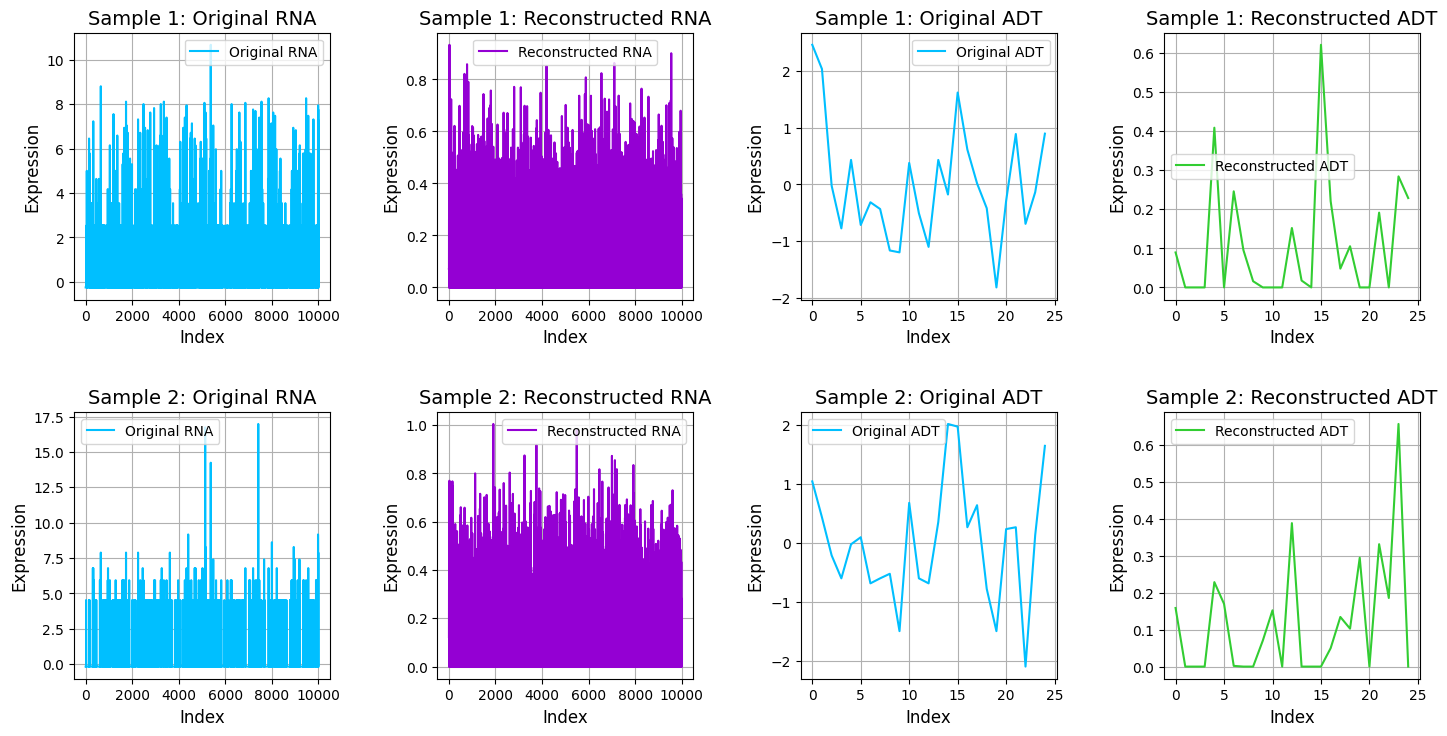

Epoch 1, Loss 51.831424713134766
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[51.831424713134766]


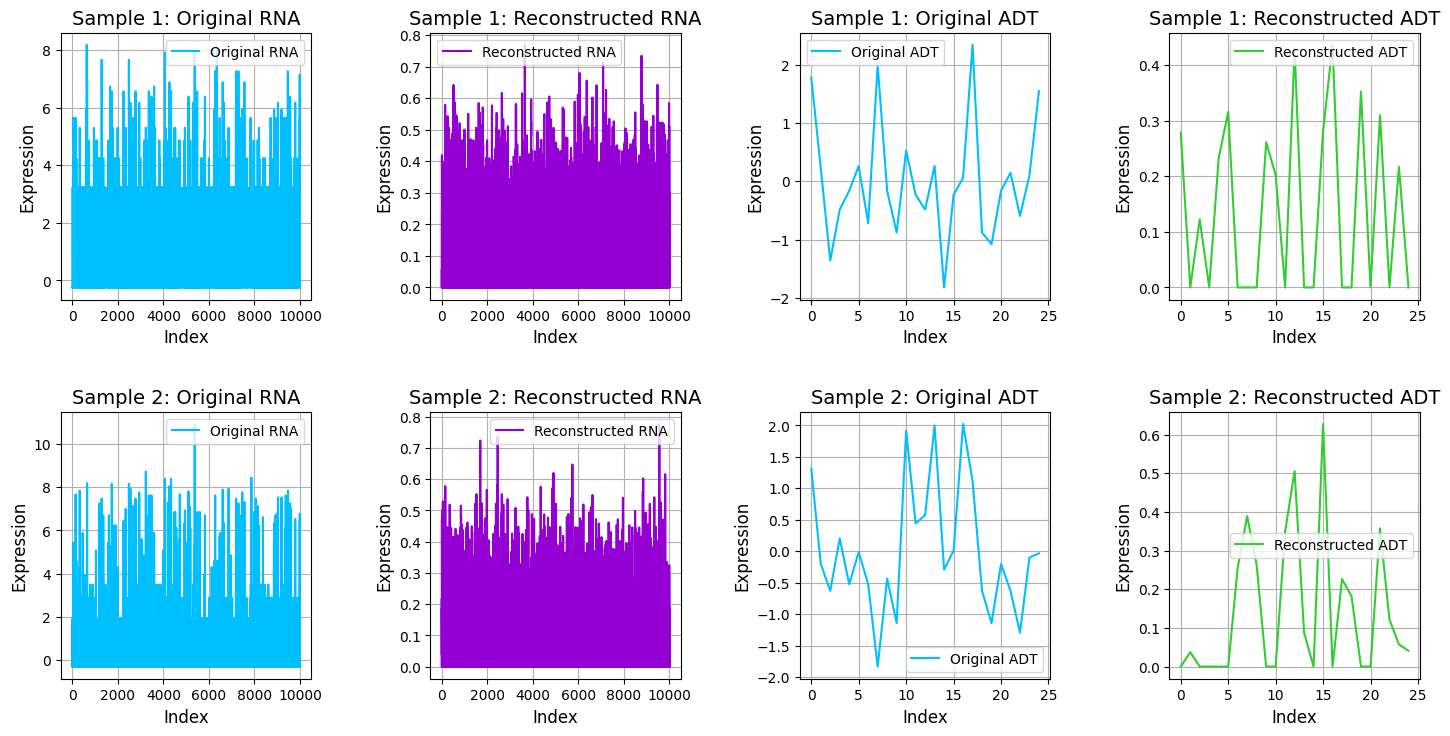

Epoch 2, Loss 54.287391662597656
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[54.287391662597656]


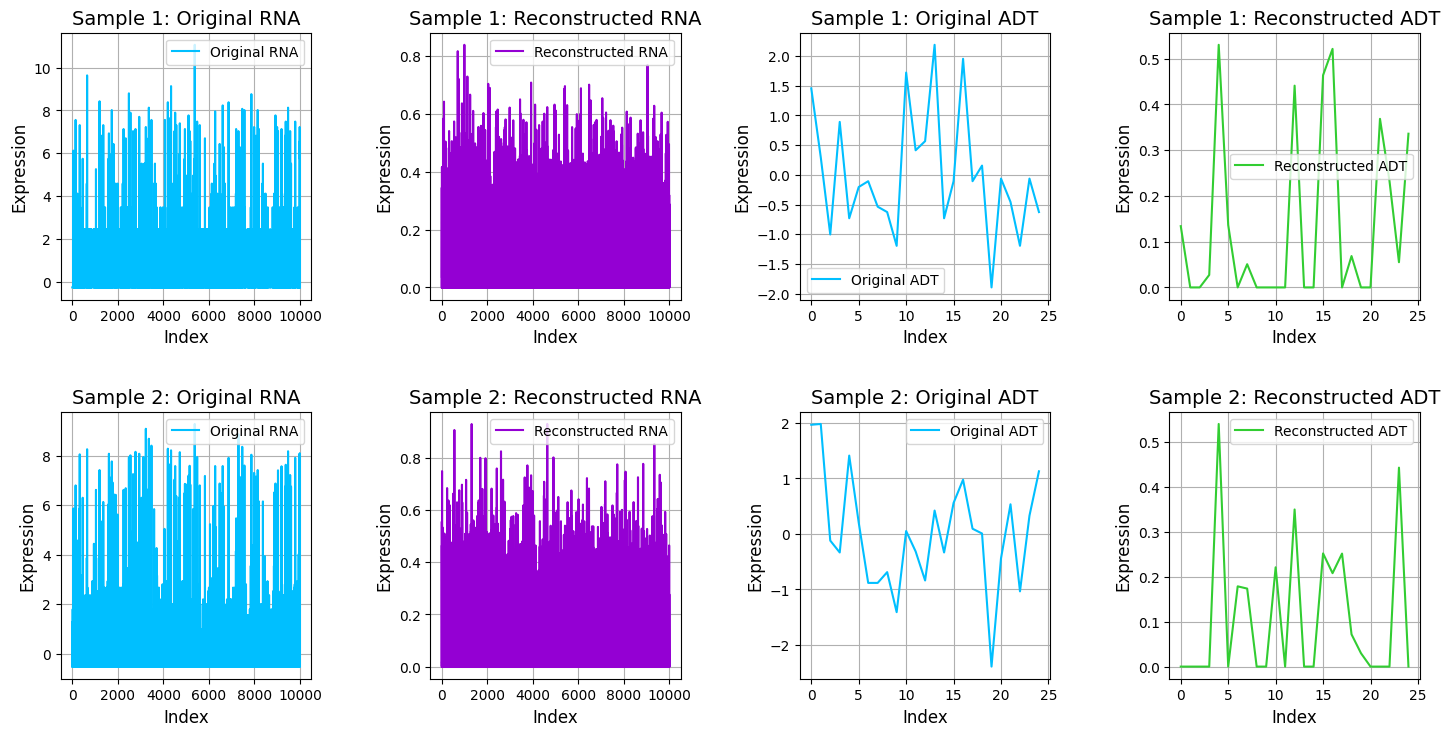

Epoch 3, Loss 52.014766693115234
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[52.014766693115234]


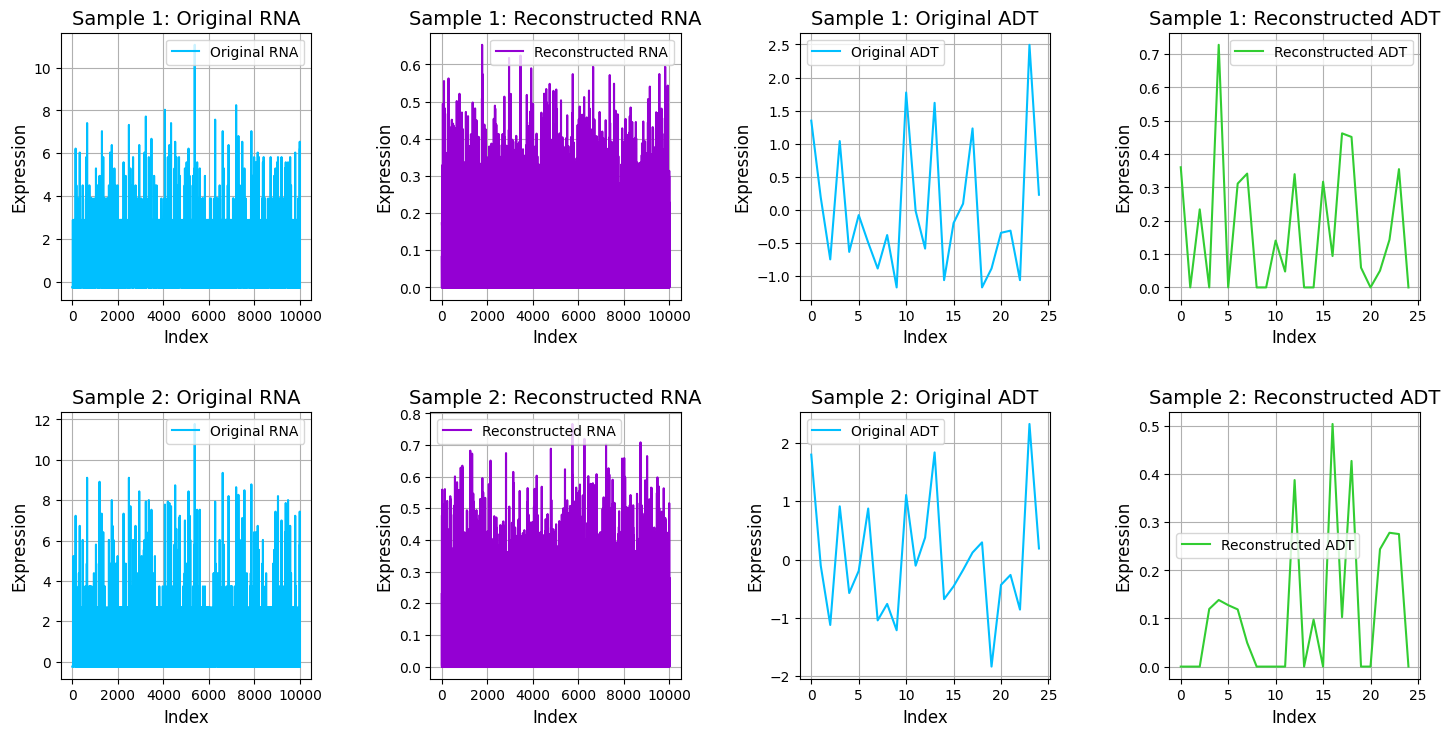

Epoch 4, Loss 51.64507293701172
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[51.64507293701172]


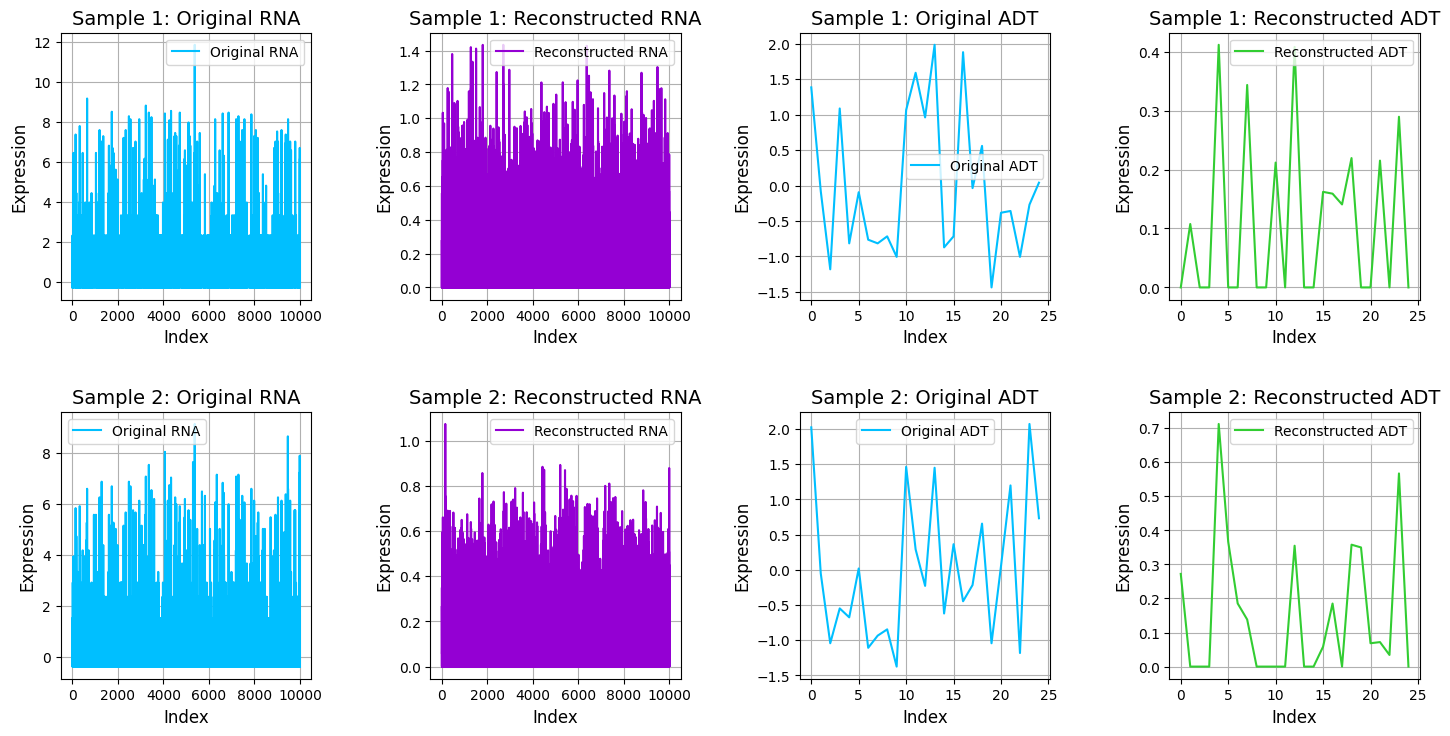

Epoch 5, Loss 52.55150604248047
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[52.55150604248047]


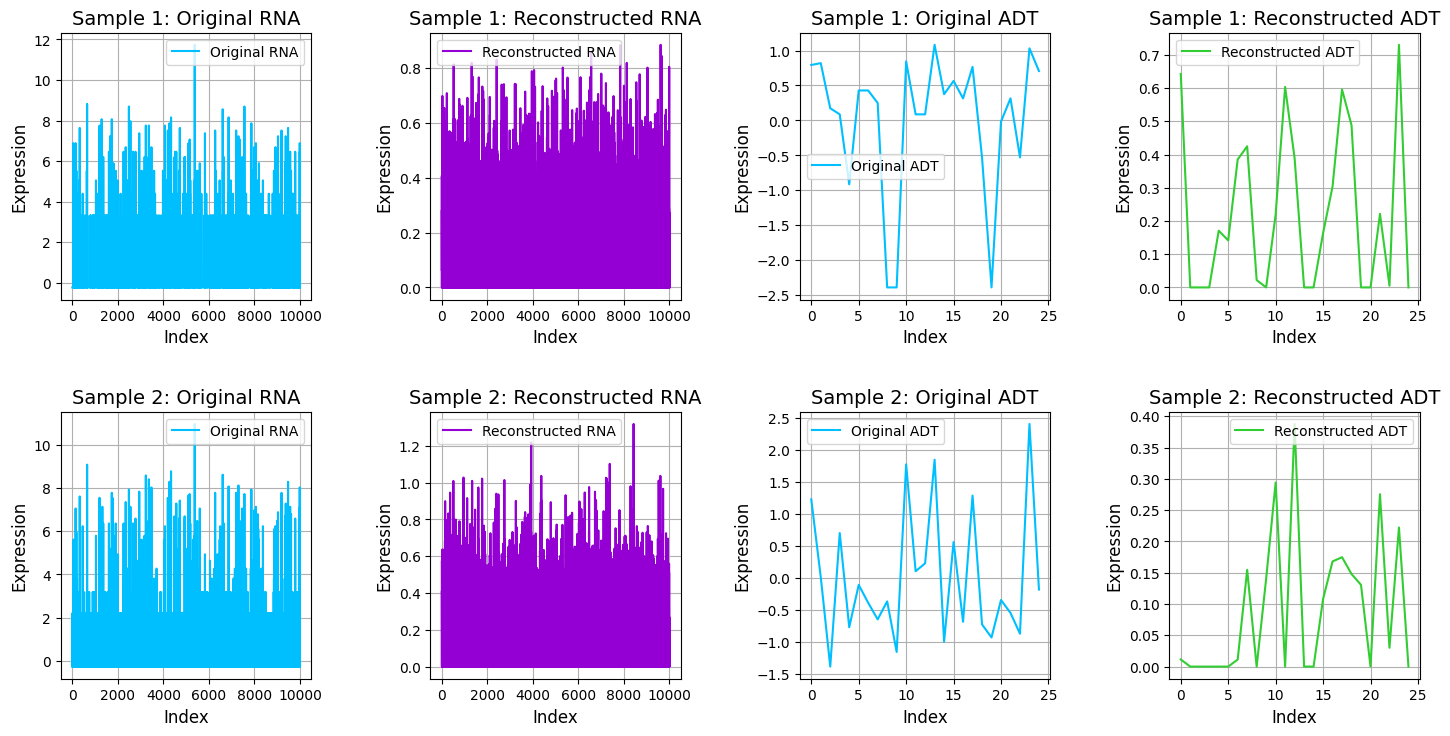

Epoch 6, Loss 51.13794708251953
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[51.13794708251953]


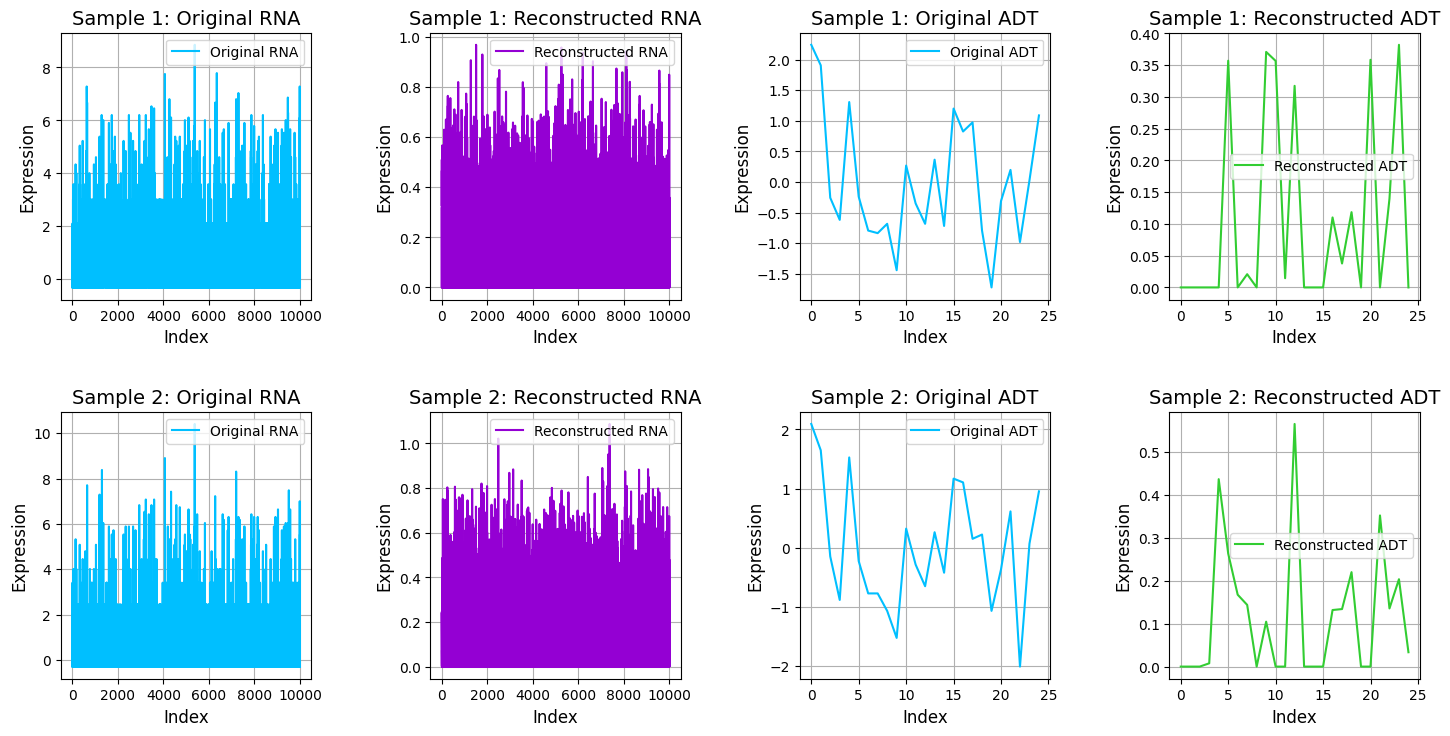

Epoch 7, Loss 53.210933685302734
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[53.210933685302734]


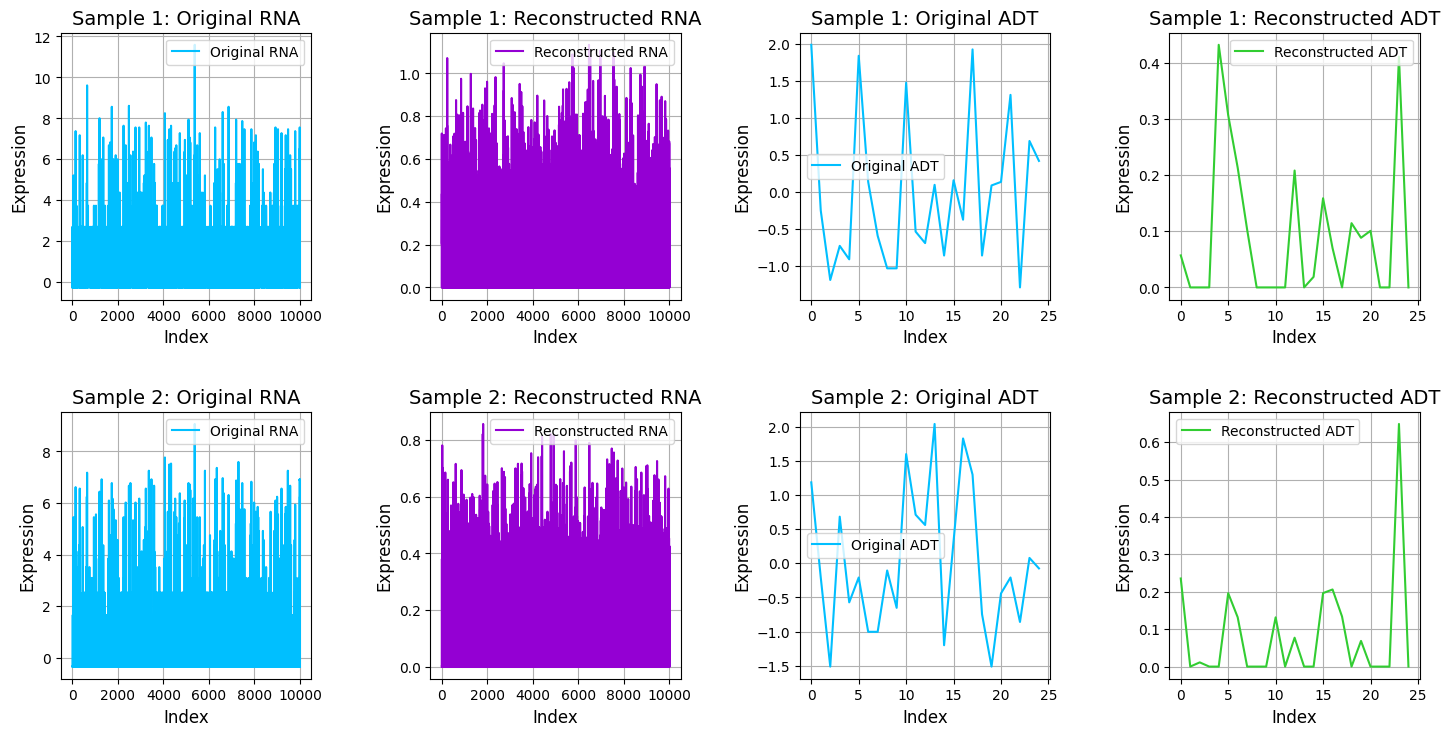

Epoch 8, Loss 53.471763610839844
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[53.471763610839844]


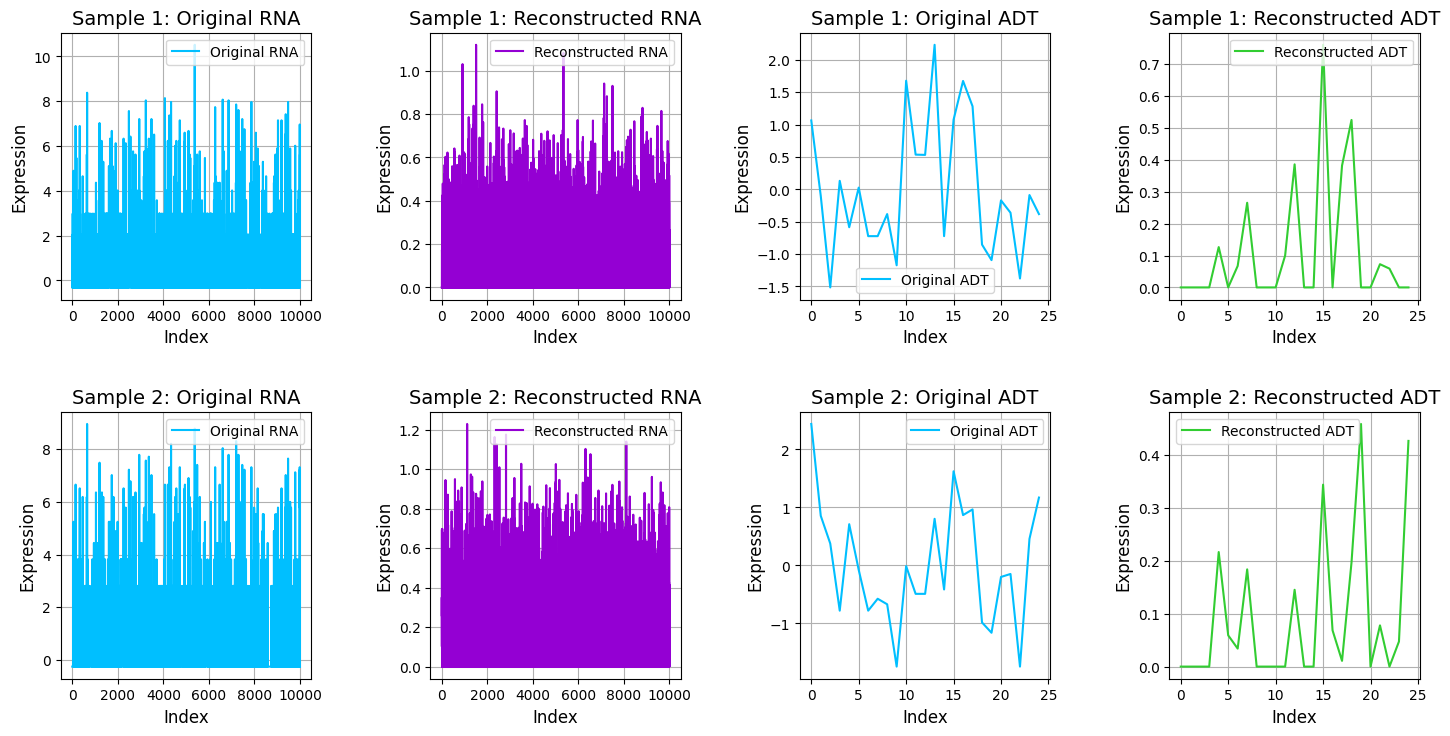

Epoch 9, Loss 51.44420623779297
Average RNA Correlation: 0.01, Average ADT Correlation: 0.05
[51.44420623779297]


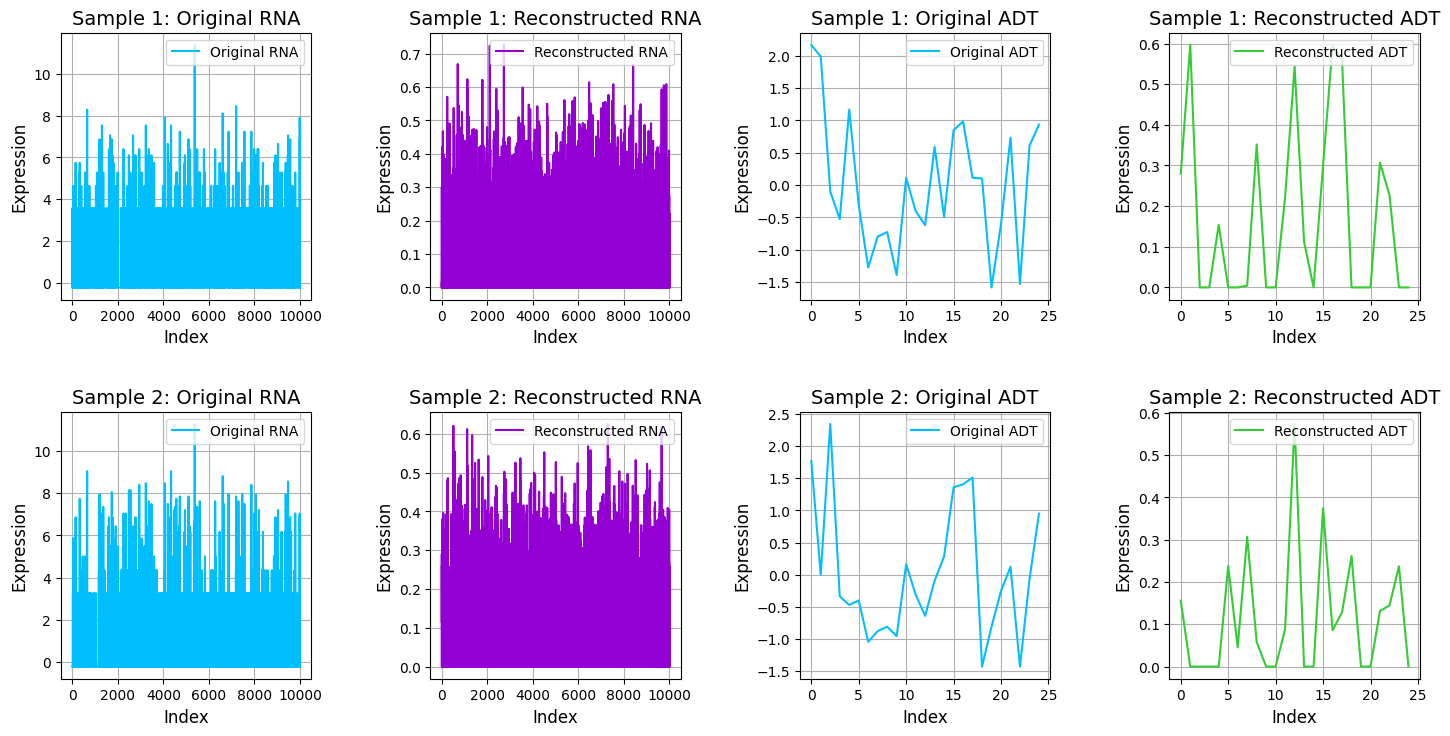

{0: [52.711788177490234], 1: [51.831424713134766], 2: [54.287391662597656], 3: [52.014766693115234], 4: [51.64507293701172], 5: [52.55150604248047], 6: [51.13794708251953], 7: [53.210933685302734], 8: [53.471763610839844], 9: [51.44420623779297]}


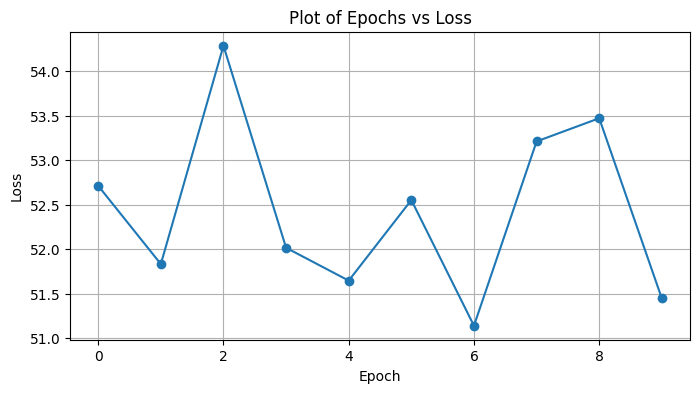

In [ ]:
def train(epoch):
    total_rna_corr = 0.0
    total_adt_corr = 0.0
    num_batches = 0
    losses = []
    for i, (rna_data, adt_data) in enumerate(train_loader):

        # Encode RNA and ADT
        rna_mean, rna_log_var = rna_encoder(rna_data)
        adt_mean, adt_log_var = adt_encoder(adt_data)

        # Sample from the latent space using the reparameterization trick
        rna_std = torch.exp(0.5 * rna_log_var)
        adt_std = torch.exp(0.5 * adt_log_var)
        rna_z = rna_mean + rna_std * torch.randn_like(rna_std)
        adt_z = adt_mean + adt_std * torch.randn_like(adt_std)

        # Decode the latent space
        reconstructed_rna = rna_decoder(rna_z)
        reconstructed_adt = adt_decoder(adt_z)

        # Calculate losses (using MSE for reconstruction)
        rna_loss = nn.MSELoss()(reconstructed_rna, rna_data)
        adt_loss = nn.MSELoss()(reconstructed_adt, adt_data)
        rna_kl_loss = -0.5 * torch.sum(1 + rna_log_var - rna_mean.pow(2) - rna_log_var.exp())
        adt_kl_loss = -0.5 * torch.sum(1 + adt_log_var - adt_mean.pow(2) - adt_log_var.exp())
        loss = rna_loss + adt_loss + rna_kl_loss + adt_kl_loss
        loss.backward()

        # Calculate Pearson correlation for RNA and ADT
        rna_corr, _ = pearsonr(reconstructed_rna.detach().cpu().numpy().flatten(), rna_data.cpu().numpy().flatten())
        adt_corr, _ = pearsonr(reconstructed_adt.detach().cpu().numpy().flatten(), adt_data.cpu().numpy().flatten())
        total_rna_corr += rna_corr
        total_adt_corr += adt_corr
        num_batches += 1

        if i % 200 == 0:
            losses.append(loss.item())
            print(f'Epoch {epoch}, Loss {loss.item()}')

    # Average correlation across all batches
    avg_rna_corr = total_rna_corr / num_batches
    avg_adt_corr = total_adt_corr / num_batches
    print(f'Average RNA Correlation: {avg_rna_corr:.2f}, Average ADT Correlation: {avg_adt_corr:.2f}')
    print(losses)

    n_samples = 2
    reconstructed_samples = reconstructed_rna
    fig, axes = plt.subplots(n_samples, 4, figsize=(15, 4 * n_samples))  # Adjust the figure size for three columns

    # Define colors for each plot
    original_color = 'deepskyblue'
    reconstructed_rna_color = 'darkviolet'
    reconstructed_adt_color = 'limegreen'

    for i in range(n_samples):
        # Plot original RNA data
        axes[i, 0].plot(rna_data[i], label='Original RNA', color=original_color)
        axes[i, 0].set_title(f'Sample {i+1}: Original RNA', fontsize=14)
        axes[i, 0].set_xlabel('Index', fontsize=12)
        axes[i, 0].set_ylabel('Expression', fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True)

        # Plot reconstructed RNA data
        axes[i, 1].plot(reconstructed_samples.detach().numpy()[i], label='Reconstructed RNA', color=reconstructed_rna_color)
        axes[i, 1].set_title(f'Sample {i+1}: Reconstructed RNA', fontsize=14)
        axes[i, 1].set_xlabel('Index', fontsize=12)
        axes[i, 1].set_ylabel('Expression', fontsize=12)
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # Plot original ADT data
        axes[i, 2].plot(adt_data[i], label='Original ADT', color=original_color)
        axes[i, 2].set_title(f'Sample {i+1}: Original ADT', fontsize=14)
        axes[i, 2].set_xlabel('Index', fontsize=12)
        axes[i, 2].set_ylabel('Expression', fontsize=12)
        axes[i, 2].legend()
        axes[i, 2].grid(True)

        # Plot reconstructed ADT data
        axes[i, 3].plot(reconstructed_adt.detach().numpy()[i], label='Reconstructed ADT', color=reconstructed_adt_color)
        axes[i, 3].set_title(f'Sample {i+1}: Reconstructed ADT', fontsize=14)
        axes[i, 3].set_xlabel('Index', fontsize=12)
        axes[i, 3].set_ylabel('Expression', fontsize=12)
        axes[i, 3].legend()
        axes[i, 3].grid(True)

    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.show()

    return losses

# Training the model
num_epochs = 10
final_dict=dict()
for epoch in range(num_epochs):
    losess=train(epoch)
    final_dict[epoch]=losess


print(final_dict)
# Plotting loss
# Extracting keys and values for plotting
x = list(final_dict.keys())
y = [value[0] for value in final_dict.values()]

# Creating the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Plot of Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [ ]:
cc=CommonClass()
predicted_adt=cc.predict_adt(test_rna,rna_encoder,adt_decoder)

In [ ]:
cc.finalCSVWritting(predicted_adt)

The results shows consistent loss values across epochs with slight fluctuations but no clear trend of improvement and the correlation metrics for both RNA and ADT remain near zero and negative indicating a lack of meaningful learning or prediction accuracy and this suggests potential issues in the models configuration or training process that require further investigation and optimization.

**Implementation of Variational autoencoder (VAE) with Adam Optimizer:**

Now, I'm adding the adam optimiser with learning rate of 0.001 to minimize the total loss,minimizing the total loss means improving the accuracy of both RNA and ADT reconstructions while ensuring that the distribution of the latent space representations stays regularized. This total loss includes components of reconstruction error and Kullback-Leibler divergence.

Epoch 0, Loss 2.040958881378174
Average RNA Correlation: 0.68, Average ADT Correlation: 0.77
[2.040958881378174]


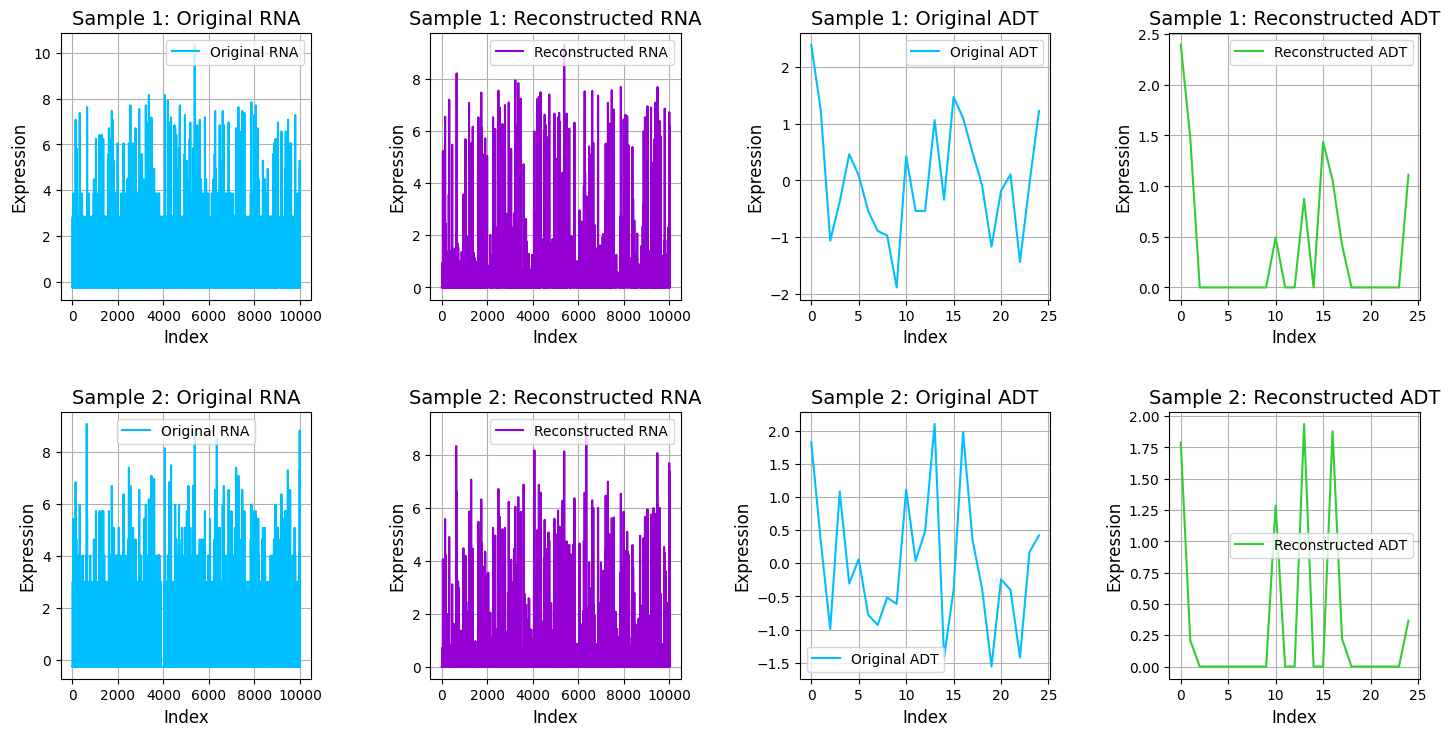

Epoch 1, Loss 1.0205779075622559
Average RNA Correlation: 0.71, Average ADT Correlation: 0.81
[1.0205779075622559]


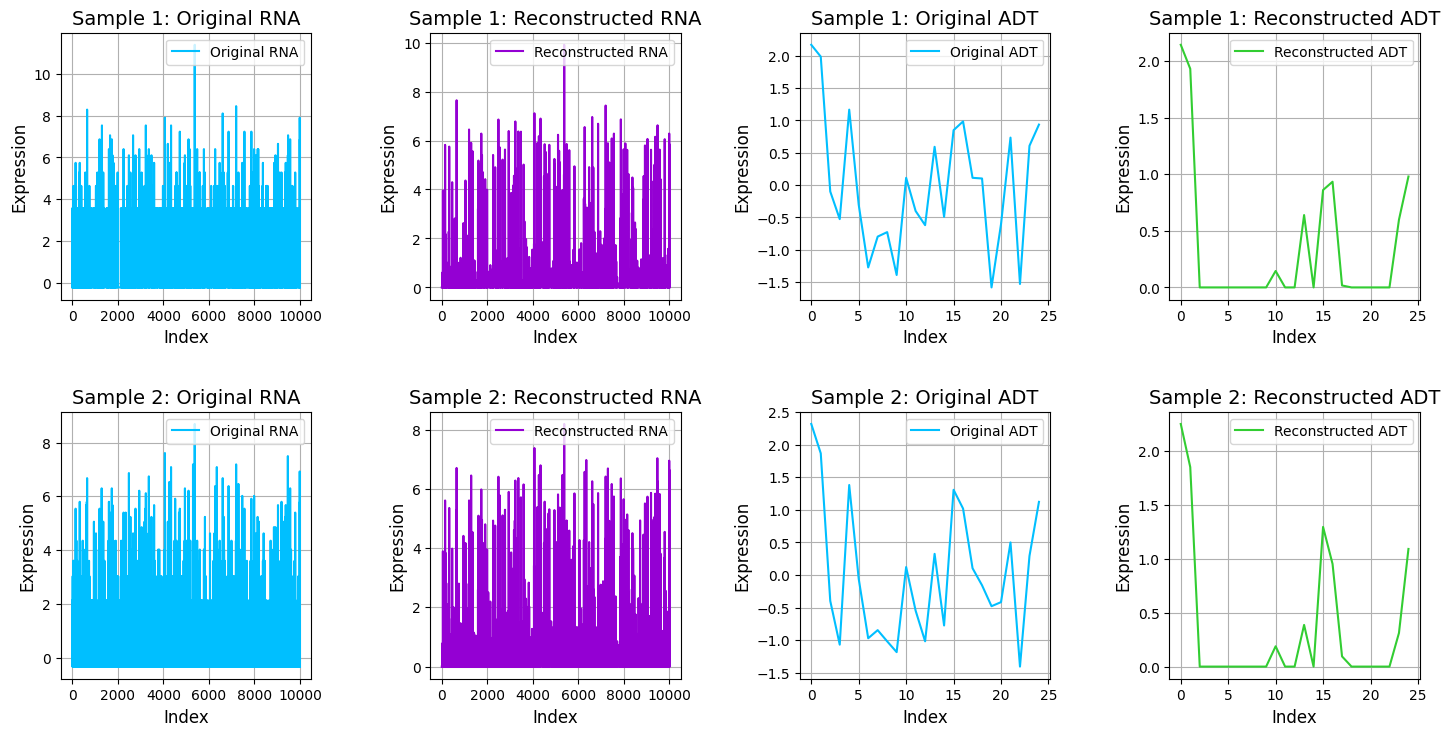

Epoch 2, Loss 0.9614174962043762
Average RNA Correlation: 0.71, Average ADT Correlation: 0.81
[0.9614174962043762]


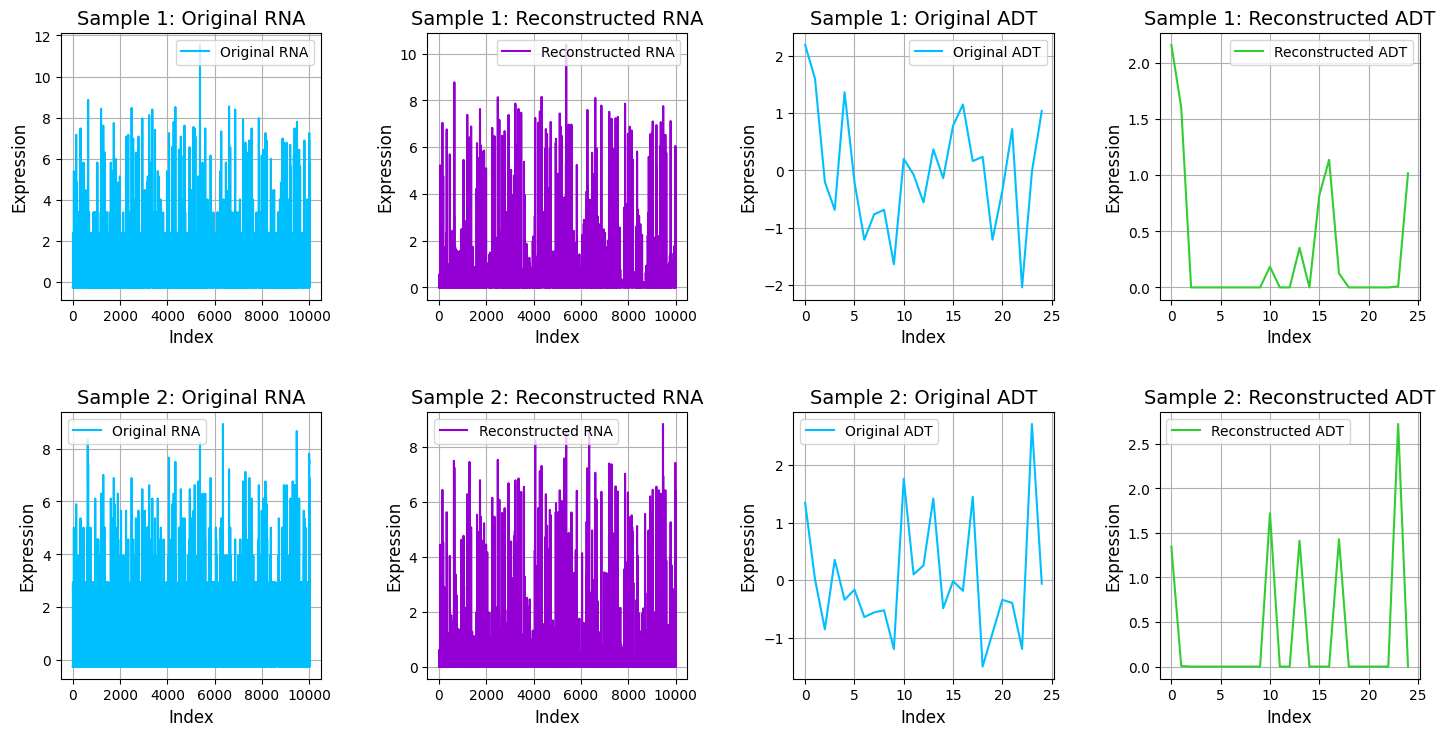

Epoch 3, Loss 0.972694993019104
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.972694993019104]


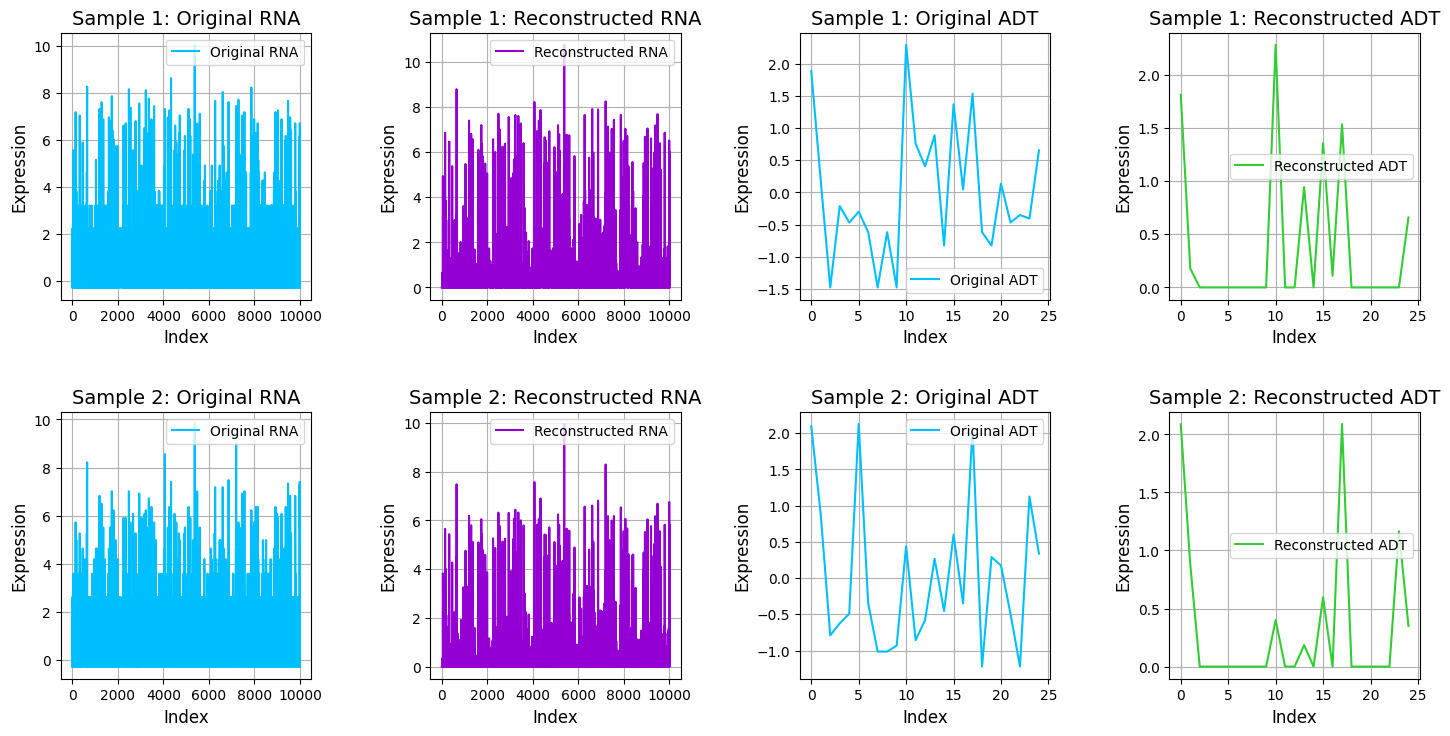

Epoch 4, Loss 0.9860734343528748
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.9860734343528748]


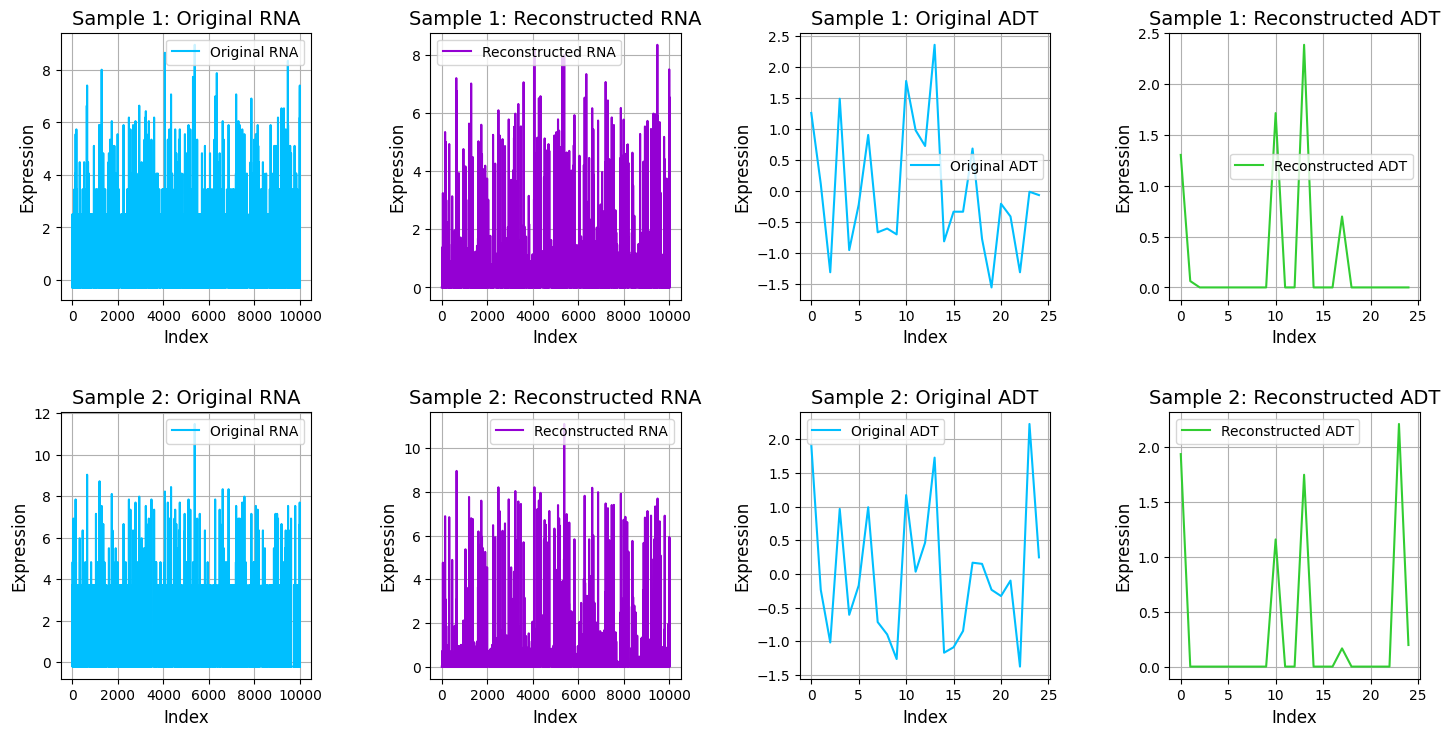

Epoch 5, Loss 0.9823218584060669
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.9823218584060669]


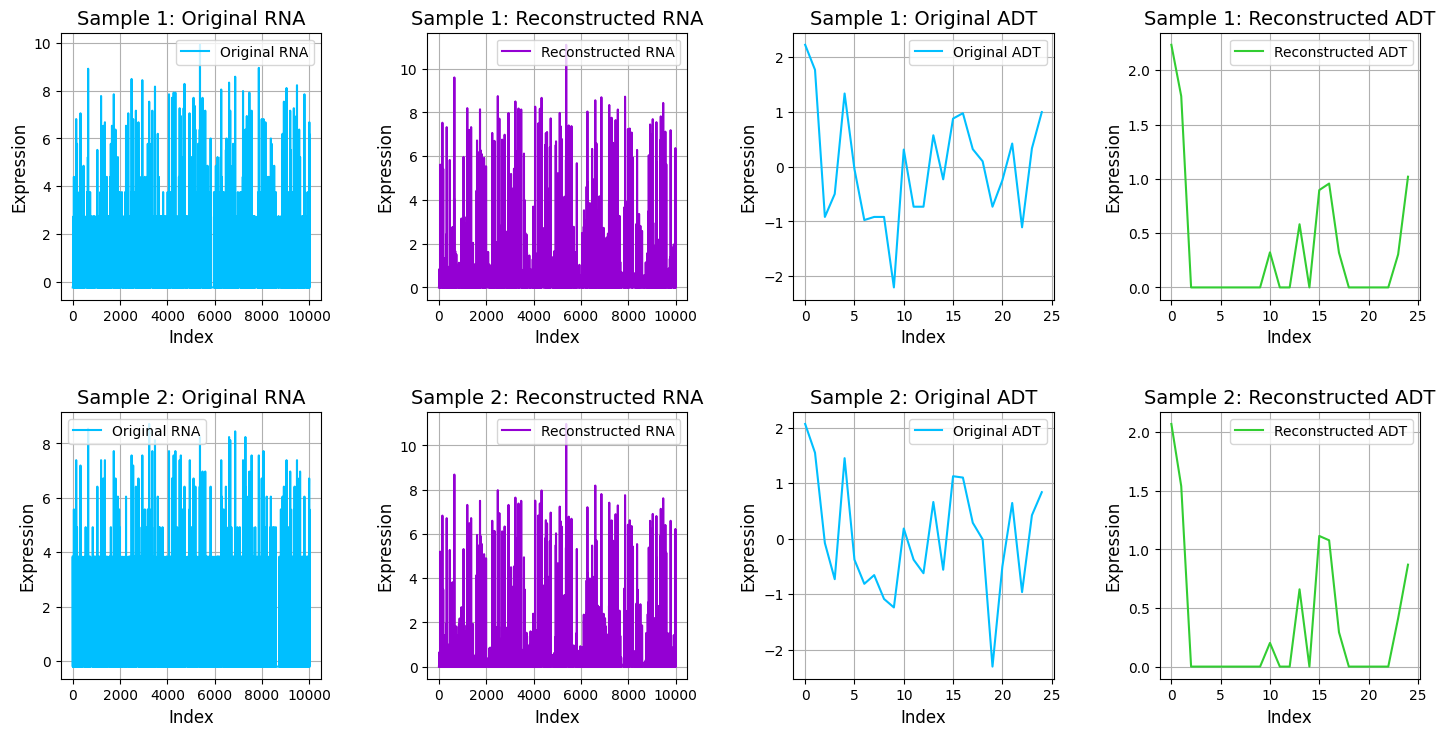

Epoch 6, Loss 0.9671204090118408
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.9671204090118408]


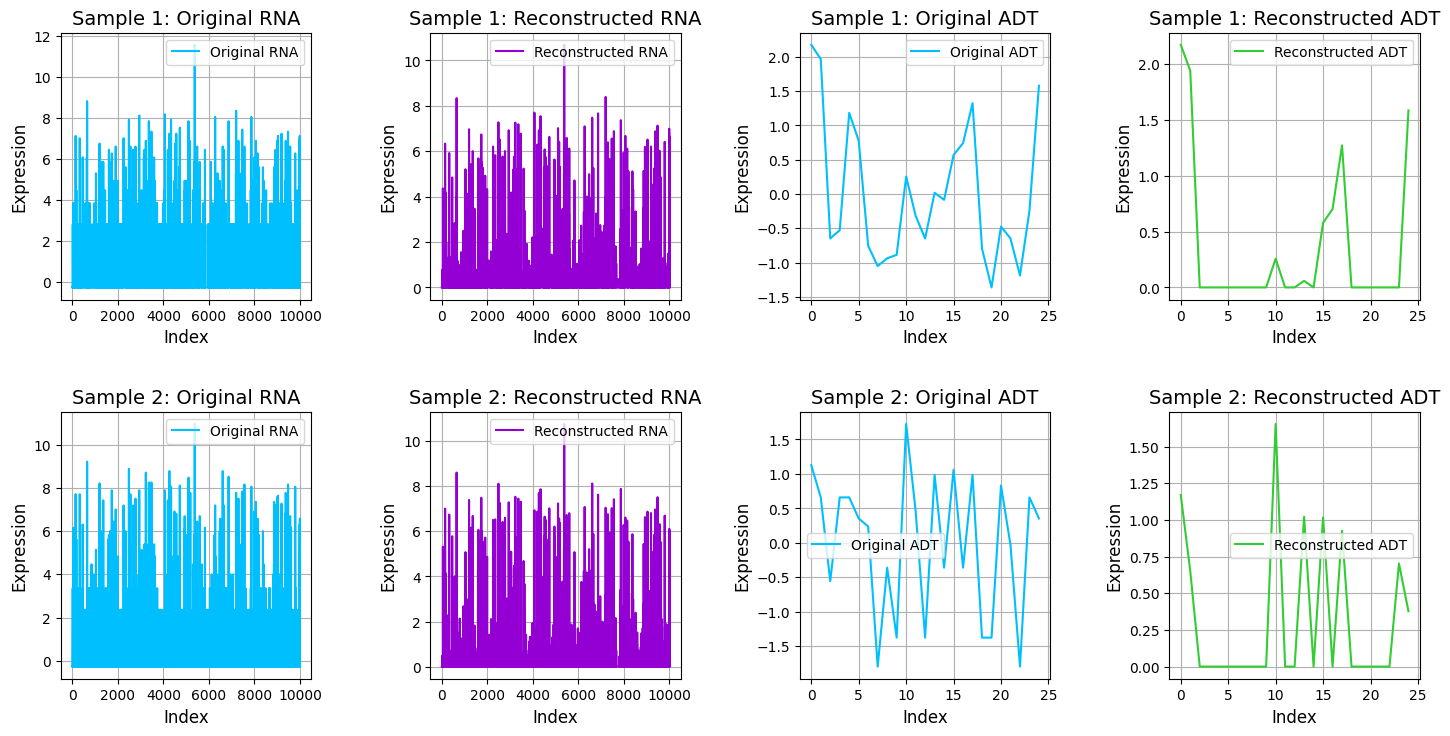

Epoch 7, Loss 0.9446693658828735
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.9446693658828735]


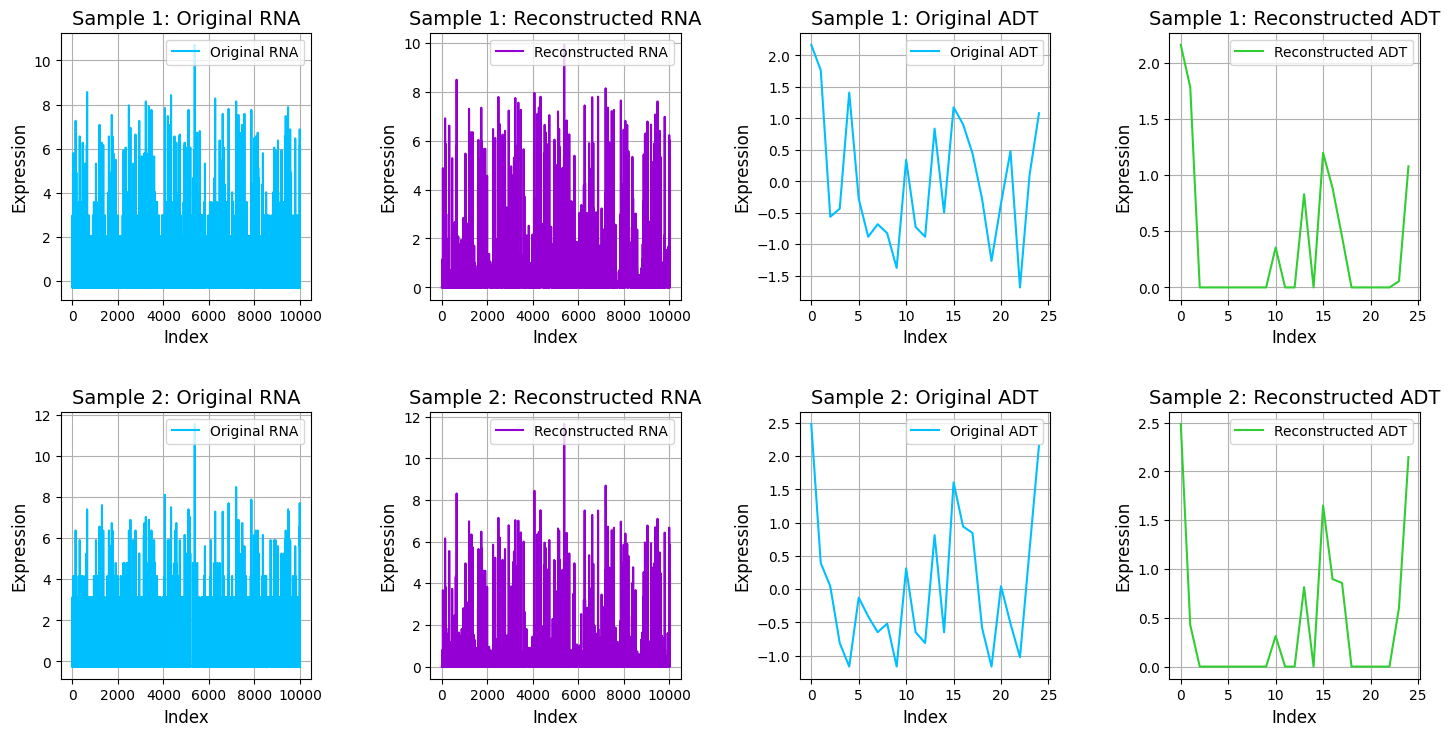

Epoch 8, Loss 0.9720262885093689
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.9720262885093689]


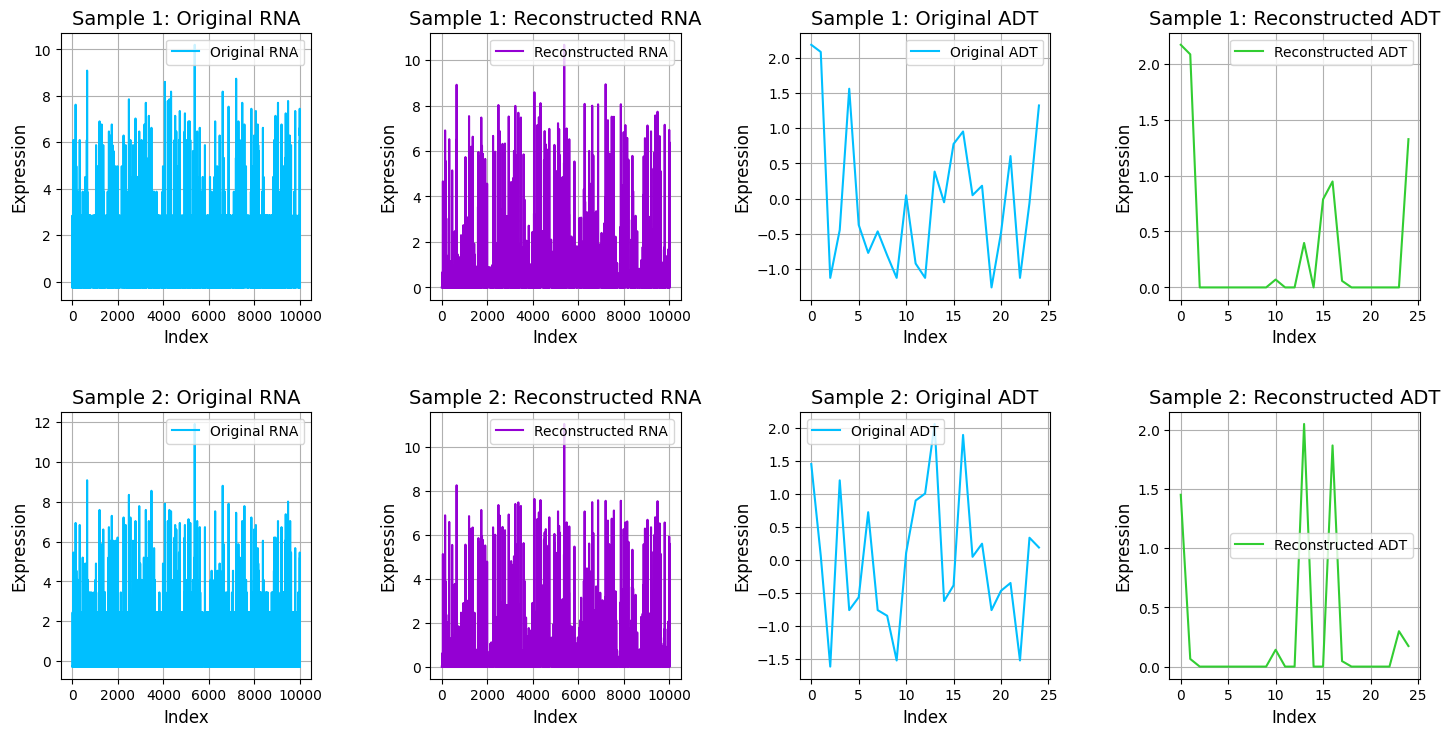

Epoch 9, Loss 0.9868570566177368
Average RNA Correlation: 0.72, Average ADT Correlation: 0.81
[0.9868570566177368]


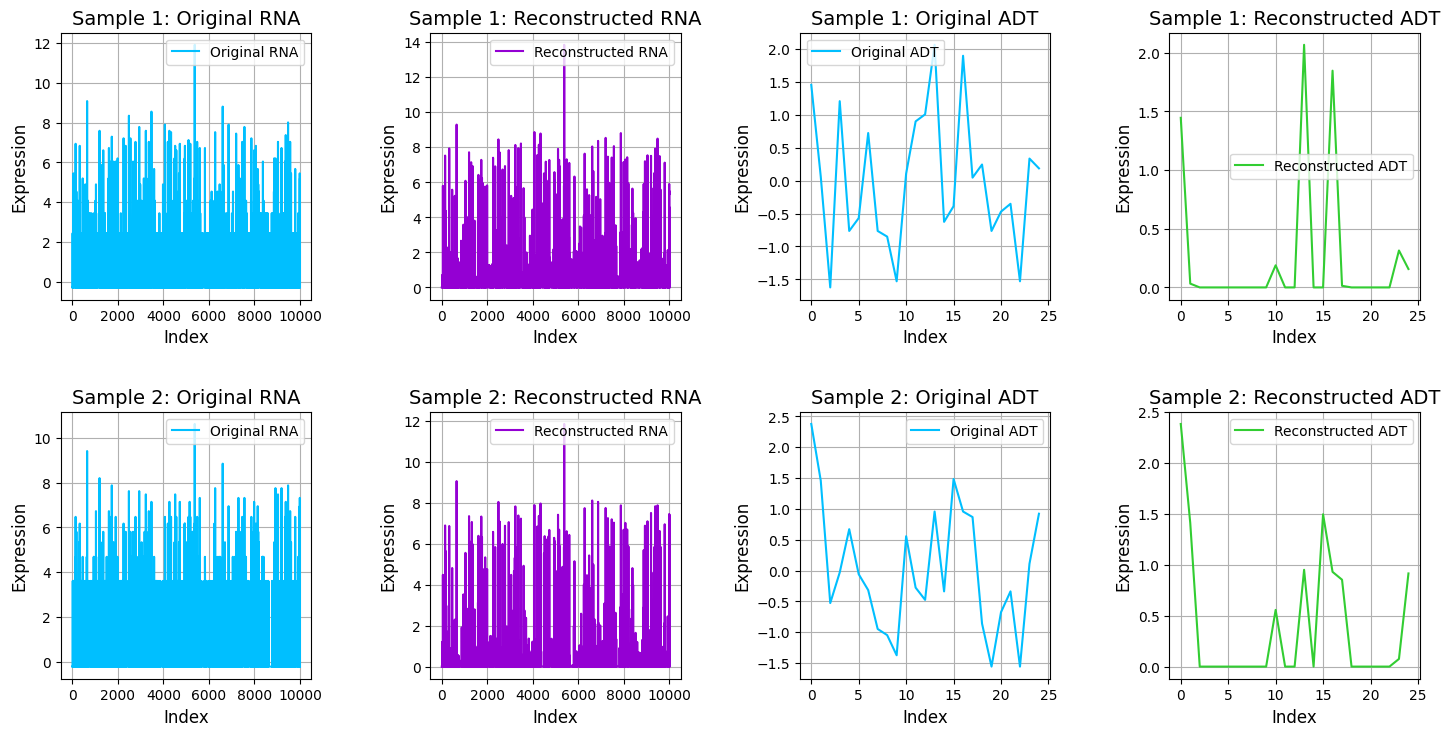

{0: [2.040958881378174], 1: [1.0205779075622559], 2: [0.9614174962043762], 3: [0.972694993019104], 4: [0.9860734343528748], 5: [0.9823218584060669], 6: [0.9671204090118408], 7: [0.9446693658828735], 8: [0.9720262885093689], 9: [0.9868570566177368]}


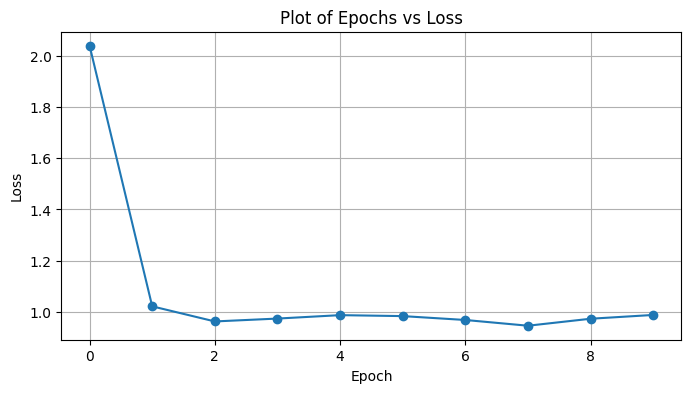

In [ ]:
optimizer = torch.optim.Adam(
    list(rna_encoder.parameters()) +
    list(adt_encoder.parameters()) +
    list(rna_decoder.parameters()) +
    list(adt_decoder.parameters()), lr=0.001)

def train(epoch):
    total_rna_corr = 0.0
    total_adt_corr = 0.0
    num_batches = 0
    losses = []
    for i, (rna_data, adt_data) in enumerate(train_loader):
        optimizer.zero_grad()

        # Encode RNA and ADT
        rna_mean, rna_log_var = rna_encoder(rna_data)
        adt_mean, adt_log_var = adt_encoder(adt_data)

        # Sample from the latent space using the reparameterization trick
        rna_std = torch.exp(0.5 * rna_log_var)
        adt_std = torch.exp(0.5 * adt_log_var)
        rna_z = rna_mean + rna_std * torch.randn_like(rna_std)
        adt_z = adt_mean + adt_std * torch.randn_like(adt_std)

        # Decode the latent space
        reconstructed_rna = rna_decoder(rna_z)
        reconstructed_adt = adt_decoder(adt_z)

        # Calculate losses (using MSE for reconstruction)
        rna_loss = nn.MSELoss()(reconstructed_rna, rna_data)
        adt_loss = nn.MSELoss()(reconstructed_adt, adt_data)
        rna_kl_loss = -0.5 * torch.sum(1 + rna_log_var - rna_mean.pow(2) - rna_log_var.exp())
        adt_kl_loss = -0.5 * torch.sum(1 + adt_log_var - adt_mean.pow(2) - adt_log_var.exp())
        loss = rna_loss + adt_loss + rna_kl_loss + adt_kl_loss
        loss.backward()
        optimizer.step()

        # Calculate Pearson correlation for RNA and ADT
        rna_corr, _ = pearsonr(reconstructed_rna.detach().cpu().numpy().flatten(), rna_data.cpu().numpy().flatten())
        adt_corr, _ = pearsonr(reconstructed_adt.detach().cpu().numpy().flatten(), adt_data.cpu().numpy().flatten())
        total_rna_corr += rna_corr
        total_adt_corr += adt_corr
        num_batches += 1

        if i % 200 == 0:
            losses.append(loss.item())
            print(f'Epoch {epoch}, Loss {loss.item()}')

    # Average correlation across all batches
    avg_rna_corr = total_rna_corr / num_batches
    avg_adt_corr = total_adt_corr / num_batches
    print(f'Average RNA Correlation: {avg_rna_corr:.2f}, Average ADT Correlation: {avg_adt_corr:.2f}')
    print(losses)

    n_samples = 2
    reconstructed_samples = reconstructed_rna
    fig, axes = plt.subplots(n_samples, 4, figsize=(15, 4 * n_samples))  # Adjust the figure size for three columns

    # Define colors for each plot
    original_color = 'deepskyblue'
    reconstructed_rna_color = 'darkviolet'
    reconstructed_adt_color = 'limegreen'

    for i in range(n_samples):
        # Plot original RNA data
        axes[i, 0].plot(rna_data[i], label='Original RNA', color=original_color)
        axes[i, 0].set_title(f'Sample {i+1}: Original RNA', fontsize=14)
        axes[i, 0].set_xlabel('Index', fontsize=12)
        axes[i, 0].set_ylabel('Expression', fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True)

        # Plot reconstructed RNA data
        axes[i, 1].plot(reconstructed_samples.detach().numpy()[i], label='Reconstructed RNA', color=reconstructed_rna_color)
        axes[i, 1].set_title(f'Sample {i+1}: Reconstructed RNA', fontsize=14)
        axes[i, 1].set_xlabel('Index', fontsize=12)
        axes[i, 1].set_ylabel('Expression', fontsize=12)
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # Plot original ADT data
        axes[i, 2].plot(adt_data[i], label='Original ADT', color=original_color)
        axes[i, 2].set_title(f'Sample {i+1}: Original ADT', fontsize=14)
        axes[i, 2].set_xlabel('Index', fontsize=12)
        axes[i, 2].set_ylabel('Expression', fontsize=12)
        axes[i, 2].legend()
        axes[i, 2].grid(True)

        # Plot reconstructed ADT data
        axes[i, 3].plot(reconstructed_adt.detach().numpy()[i], label='Reconstructed ADT', color=reconstructed_adt_color)
        axes[i, 3].set_title(f'Sample {i+1}: Reconstructed ADT', fontsize=14)
        axes[i, 3].set_xlabel('Index', fontsize=12)
        axes[i, 3].set_ylabel('Expression', fontsize=12)
        axes[i, 3].legend()
        axes[i, 3].grid(True)

    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.show()

    return losses

# Training the model
num_epochs = 10
final_dict=dict()
for epoch in range(num_epochs):
    losess=train(epoch)
    final_dict[epoch]=losess


print(final_dict)
# Plotting loss
# Extracting keys and values for plotting
x = list(final_dict.keys())
y = [value[0] for value in final_dict.values()]

# Creating the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Plot of Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [ ]:
cc1=CommonClass()
predicted_adt=cc1.predict_adt(test_rna,rna_encoder,adt_decoder)

In [ ]:
cc1.finalCSVWritting(predicted_adt)

The results with the Adam optimizer indicate a significant improvement in both the loss reduction and correlation metrics compared to the earlier training with basic approach. Starting with a loss of 2.07, the loss quickly decreased and stabilized around 0.92 to 0.97 in subsequent epochs. Additionally, the Average RNA Correlation and ADT Correlation are robust, consistently achieving values around 0.72 and 0.83 respectively. This demonstrates that the model is effectively learning and predicting the patterns within the RNA and ADT data, highlighting the effectiveness of the Adam optimizer in this context.

**Introducing Batch Normalization and LeakyRelu:**

Batch Normalization stabilizes and speeds up the training while improving generalization, and LeakyReLU prevents dead neurons and enhances feature learning by allowing small gradients when inactive. Both techniques contribute to a more robust and efficient training process

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.BatchNorm1d(512),  # Batch normalization layer
            nn.LeakyReLU(0.1),   # LeakyReLU with a small slope for the negative part
            nn.Linear(512, latent_dim * 2)
        )

    def forward(self, x):
        params = self.network(x)
        mean, log_var = params[:, :latent_dim], params[:, latent_dim:]
        return mean, log_var

class Decoder(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )

    def forward(self, z):
        return self.network(z)

latent_dim = 20

# Encoders and decoders for RNA and ADT
rna_encoder = Encoder(10000, latent_dim)
adt_encoder = Encoder(25, latent_dim)
rna_decoder = Decoder(latent_dim, 10000)
adt_decoder = Decoder(latent_dim, 25)


Epoch 0, Loss 0.5016369223594666
Average RNA Correlation: 0.73, Average ADT Correlation: 0.98
[0.5016369223594666]


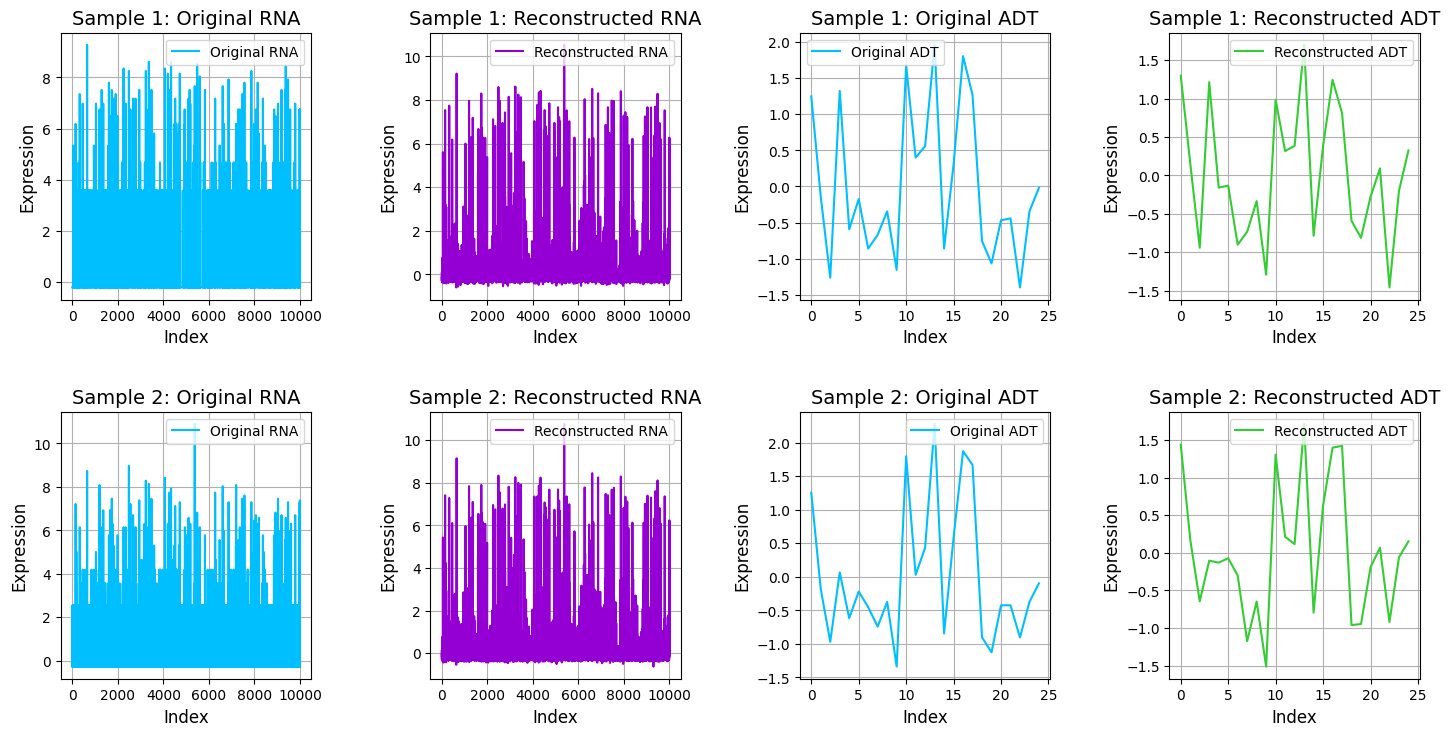

Epoch 1, Loss 0.46770238876342773
Average RNA Correlation: 0.74, Average ADT Correlation: 0.98
[0.46770238876342773]


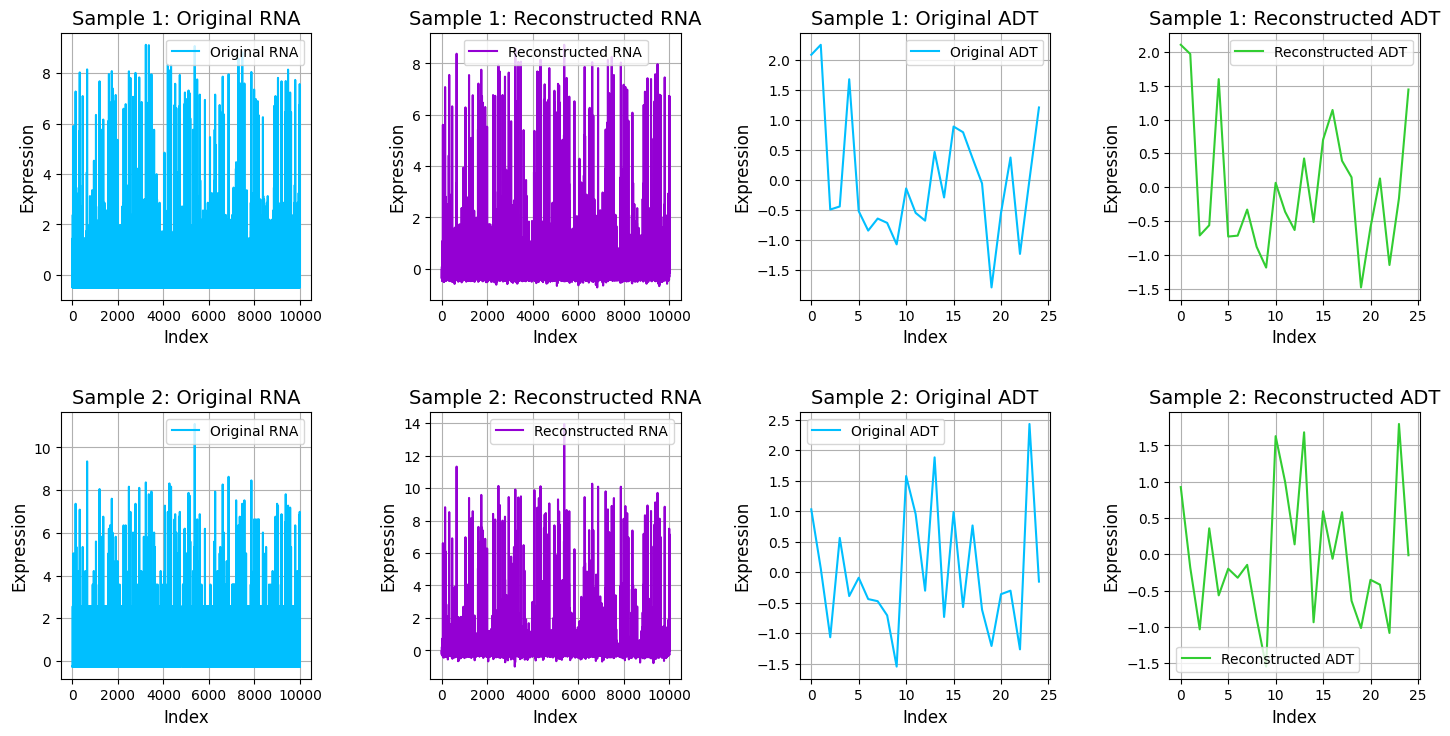

Epoch 2, Loss 0.48007601499557495
Average RNA Correlation: 0.74, Average ADT Correlation: 0.99
[0.48007601499557495]


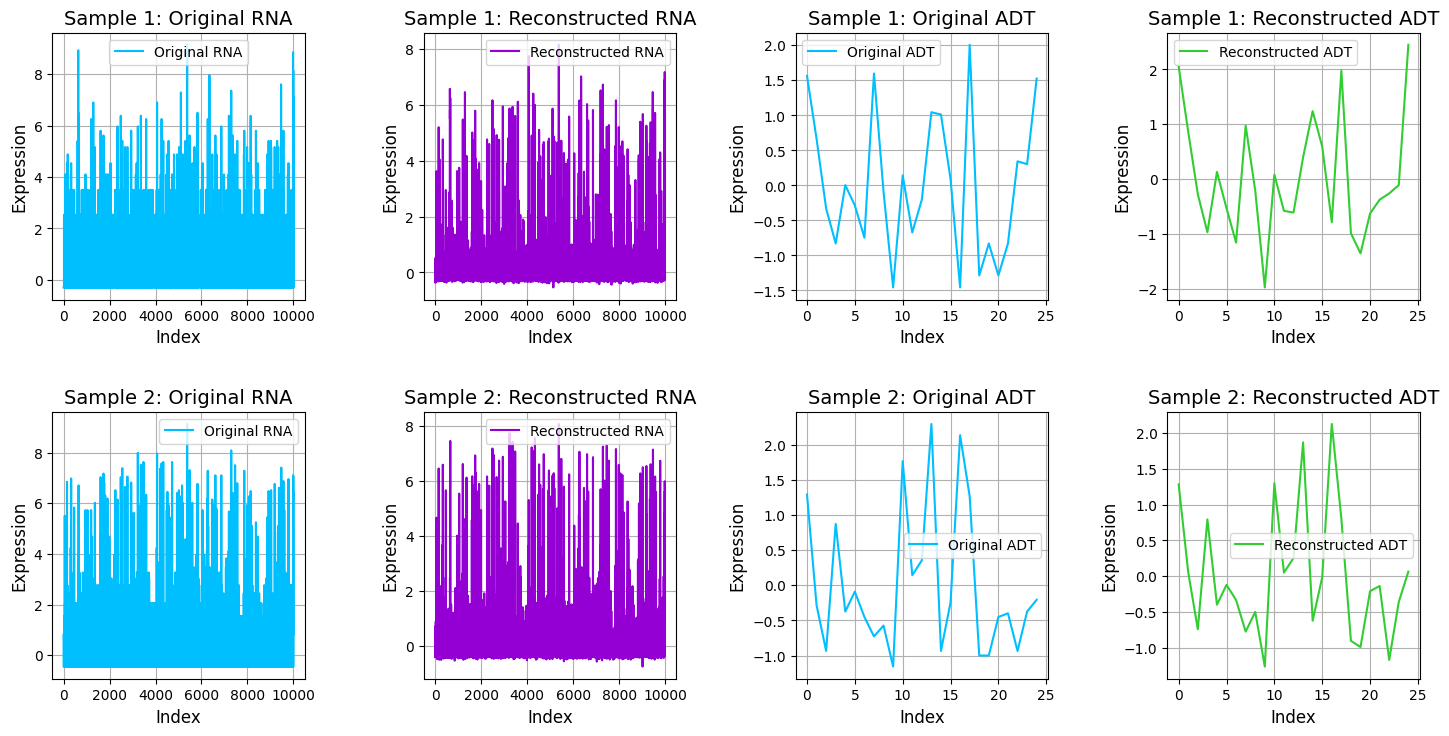

Epoch 3, Loss 0.4677360951900482
Average RNA Correlation: 0.74, Average ADT Correlation: 0.99
[0.4677360951900482]


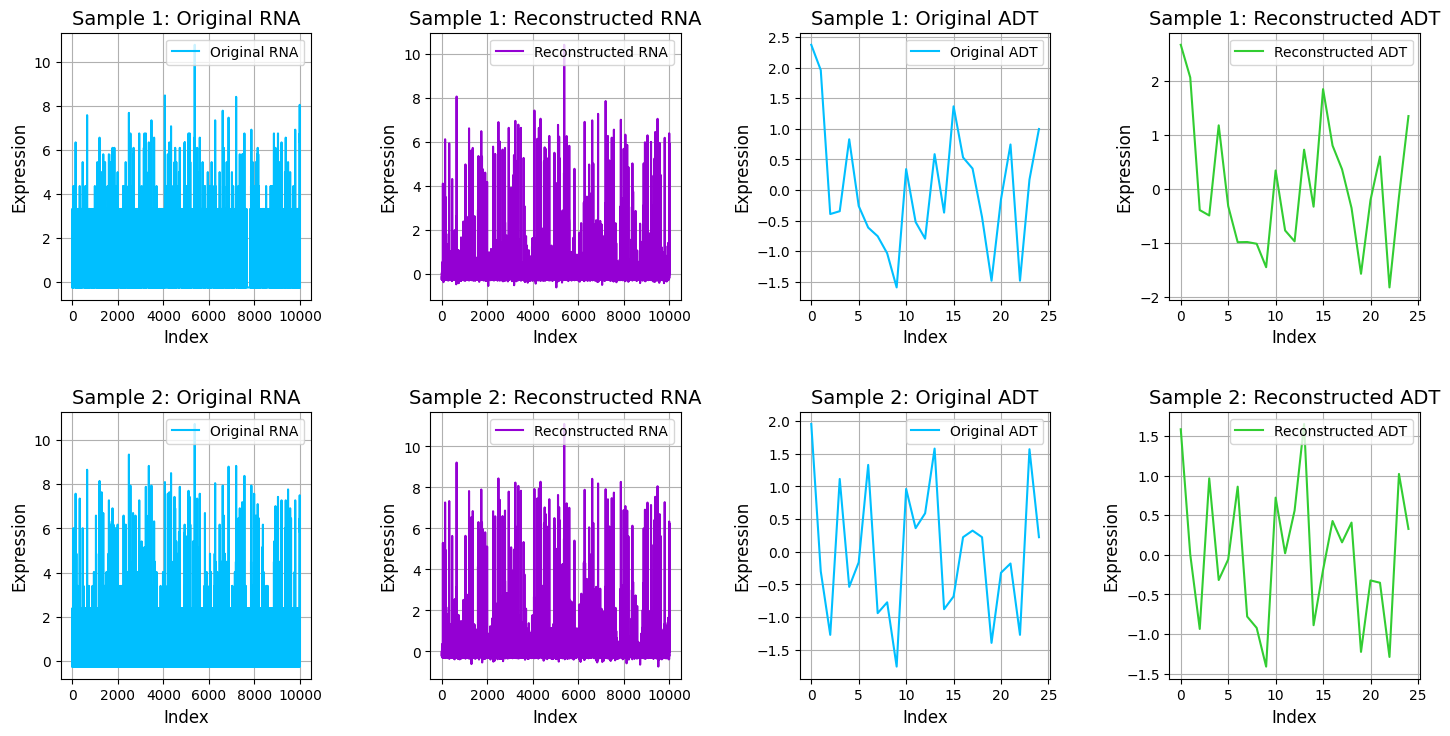

Epoch 4, Loss 0.4695768654346466
Average RNA Correlation: 0.74, Average ADT Correlation: 0.99
[0.4695768654346466]


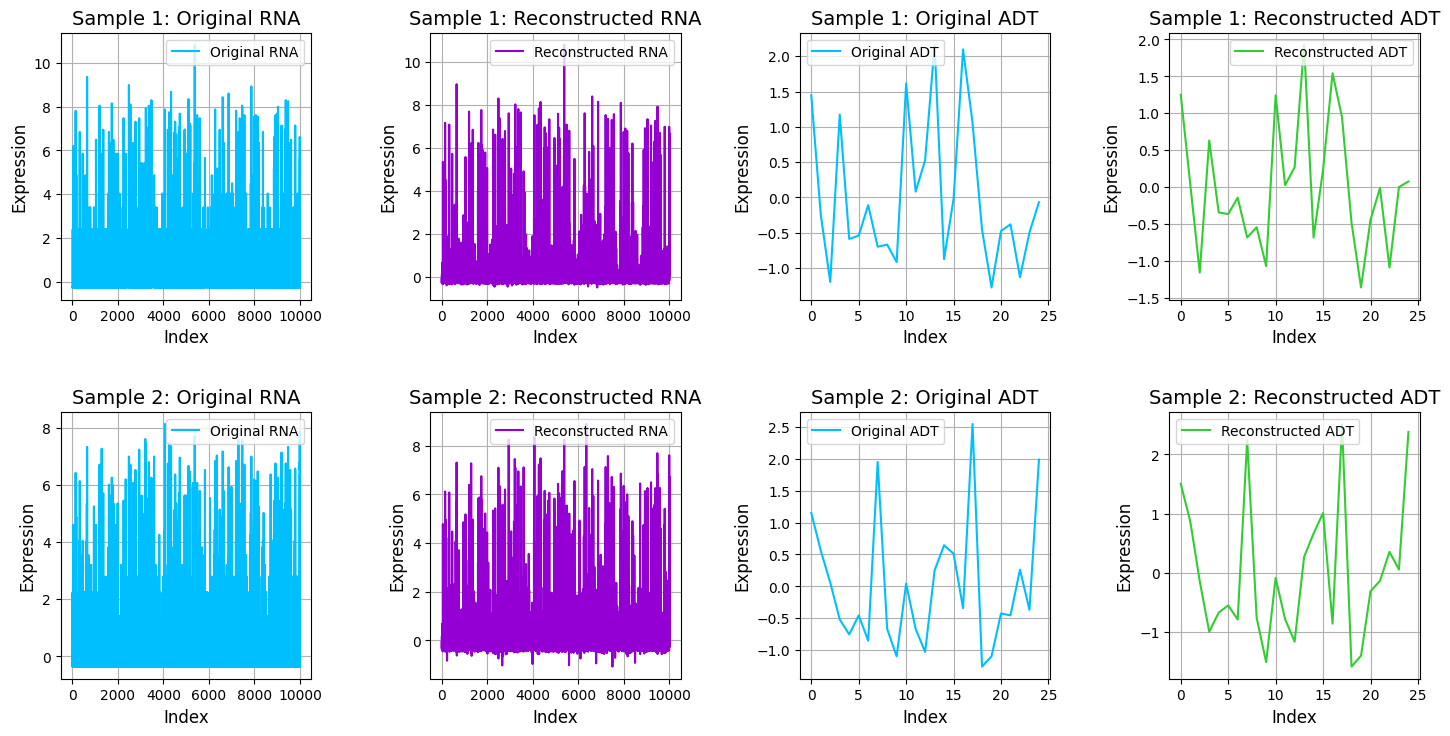

Epoch 5, Loss 0.43976473808288574
Average RNA Correlation: 0.75, Average ADT Correlation: 0.99
[0.43976473808288574]


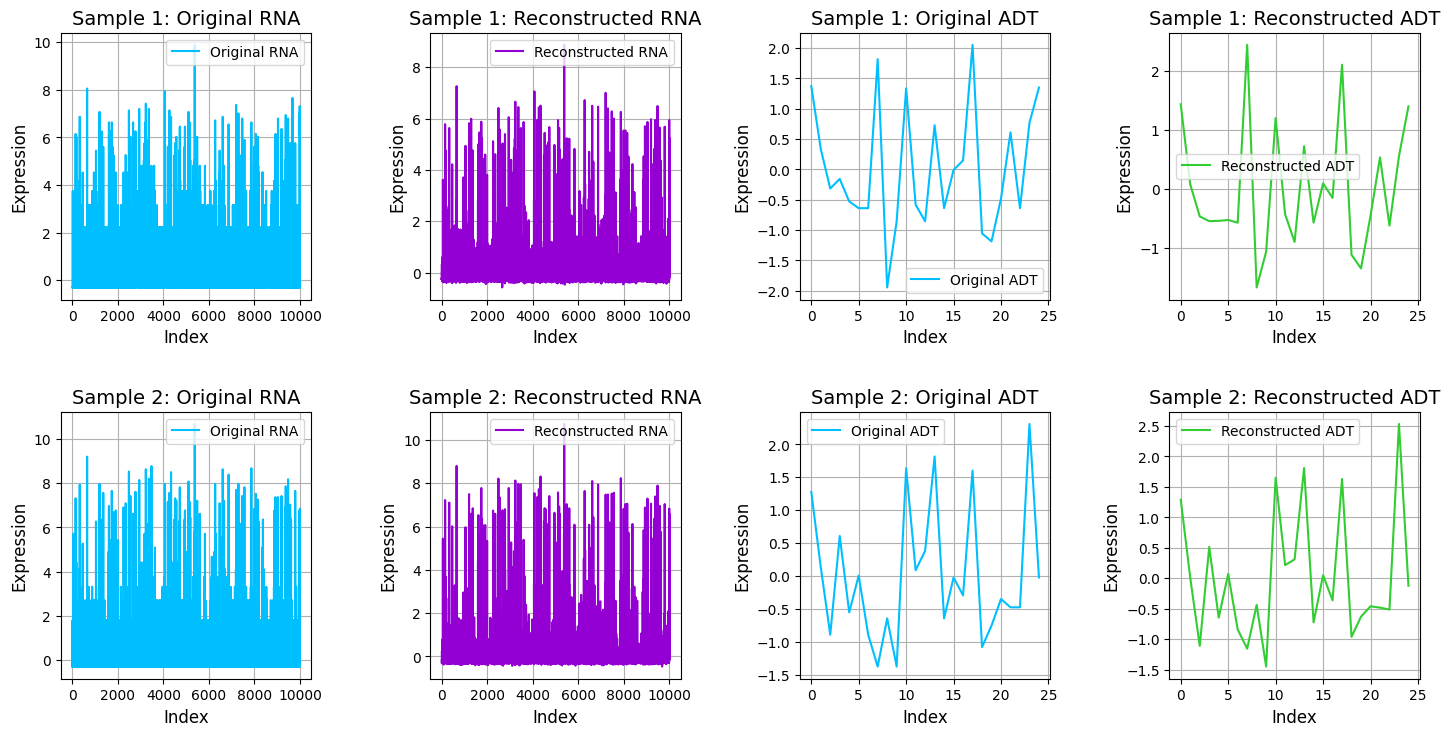

Epoch 6, Loss 0.4854961931705475
Average RNA Correlation: 0.75, Average ADT Correlation: 0.99
[0.4854961931705475]


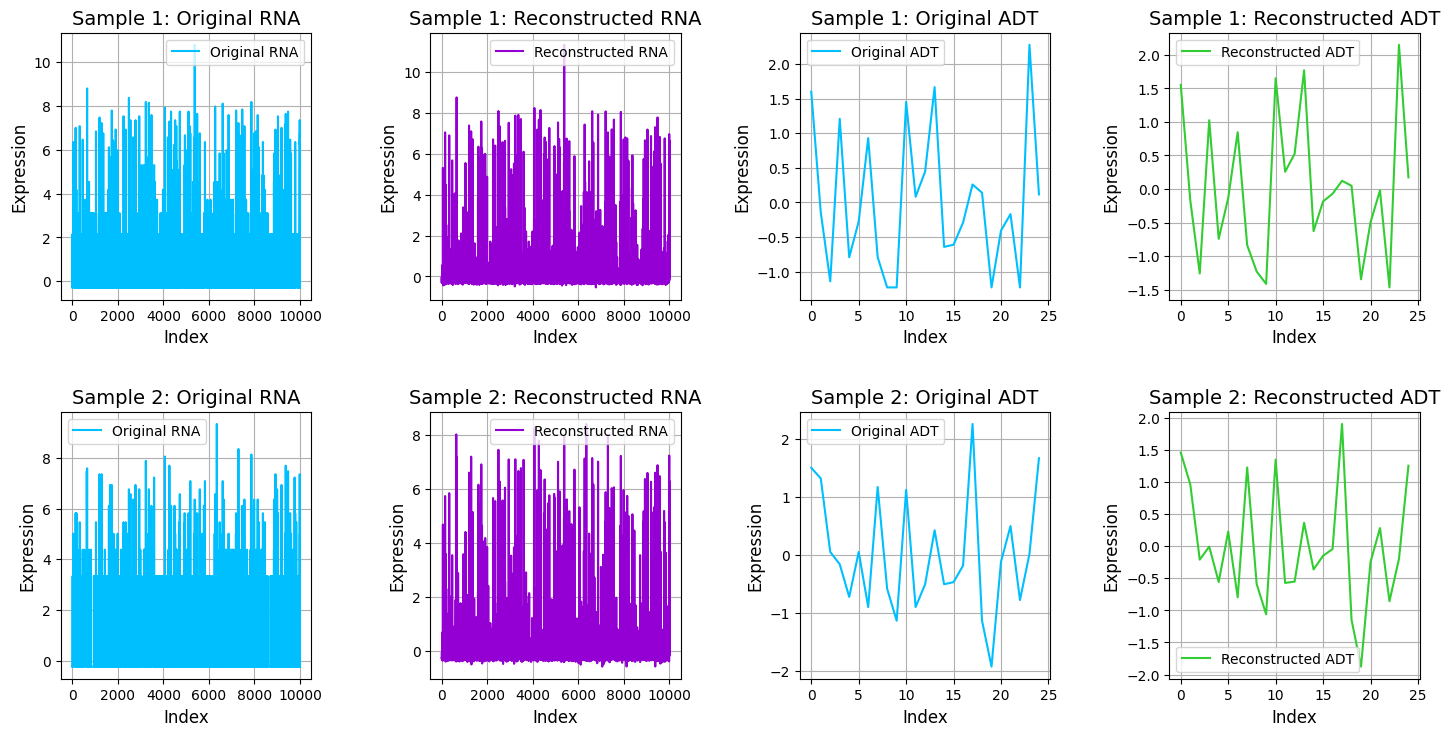

Epoch 7, Loss 0.4652152359485626
Average RNA Correlation: 0.75, Average ADT Correlation: 0.99
[0.4652152359485626]


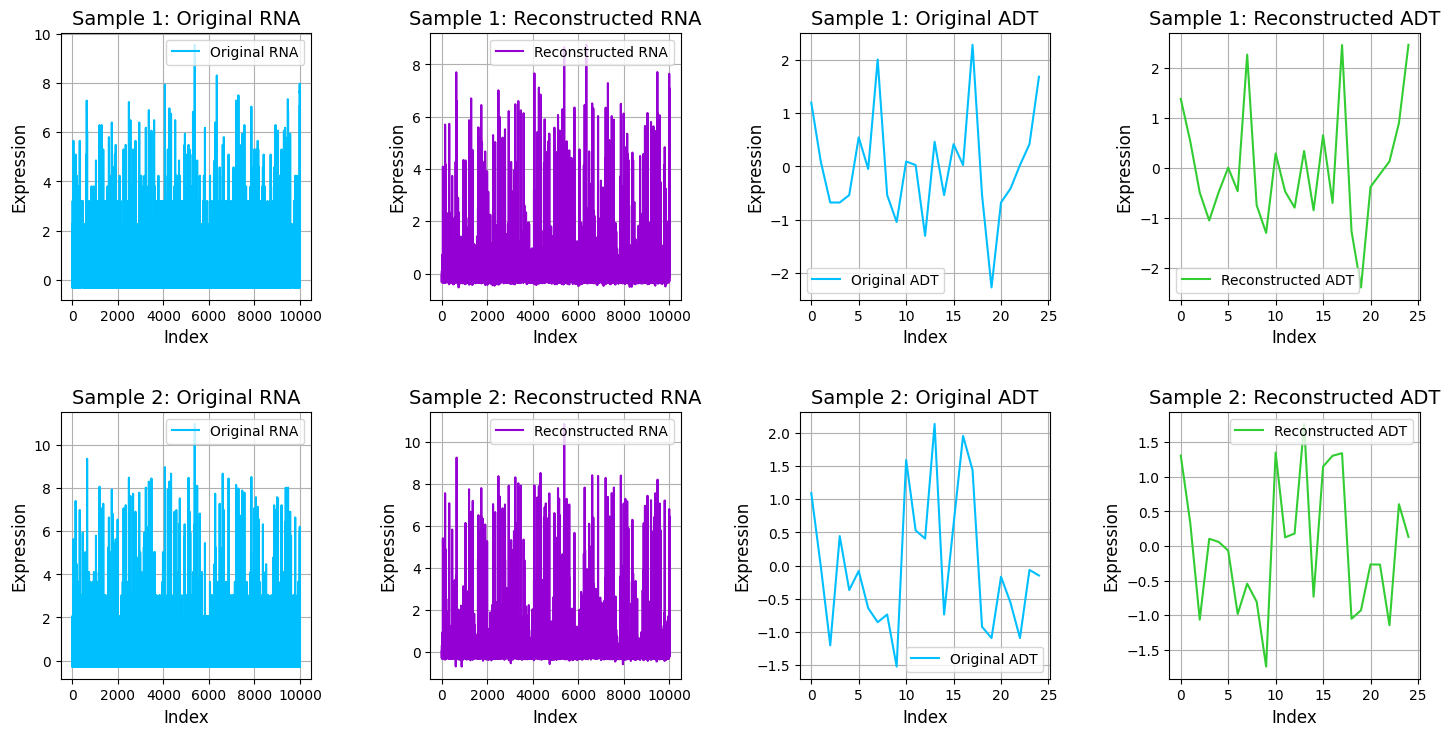

Epoch 8, Loss 0.45370471477508545
Average RNA Correlation: 0.75, Average ADT Correlation: 0.99
[0.45370471477508545]


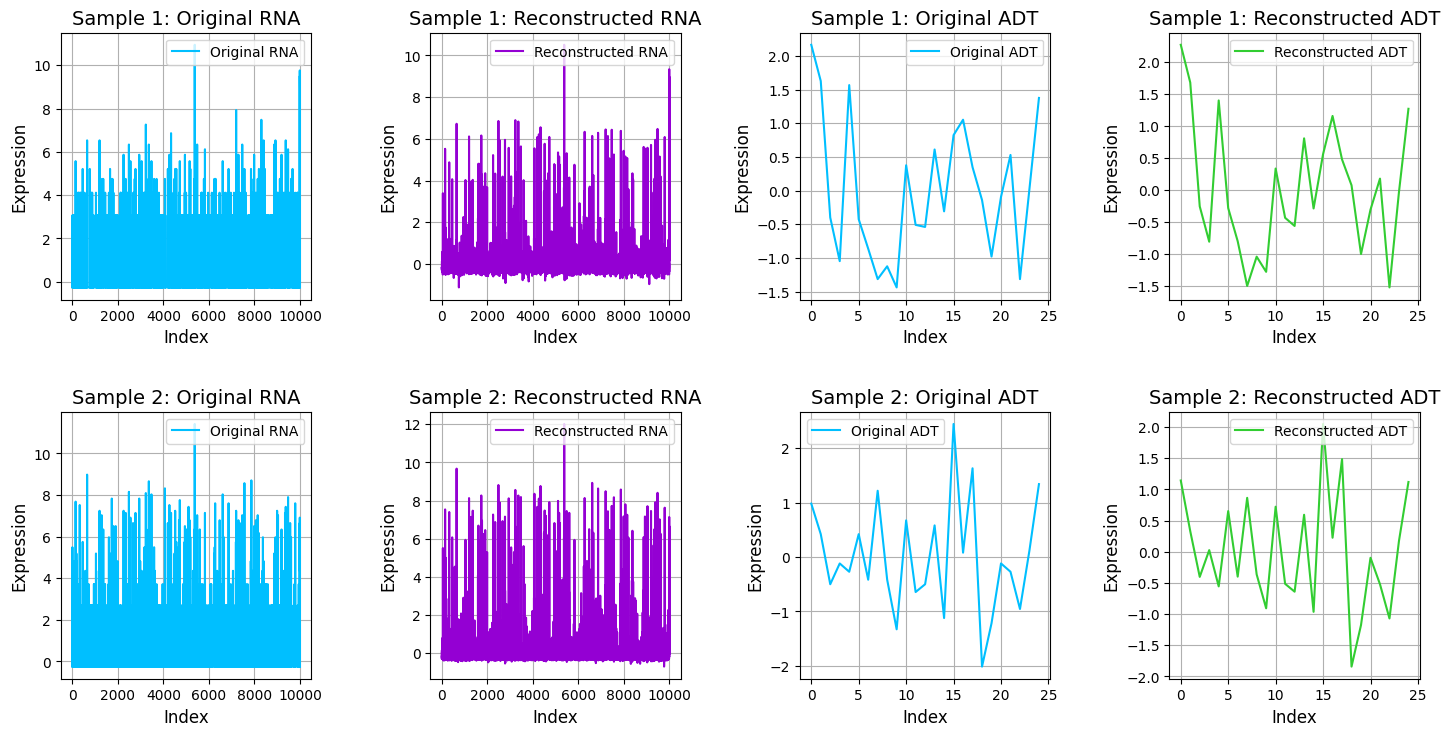

Epoch 9, Loss 0.45183417201042175
Average RNA Correlation: 0.75, Average ADT Correlation: 0.99
[0.45183417201042175]


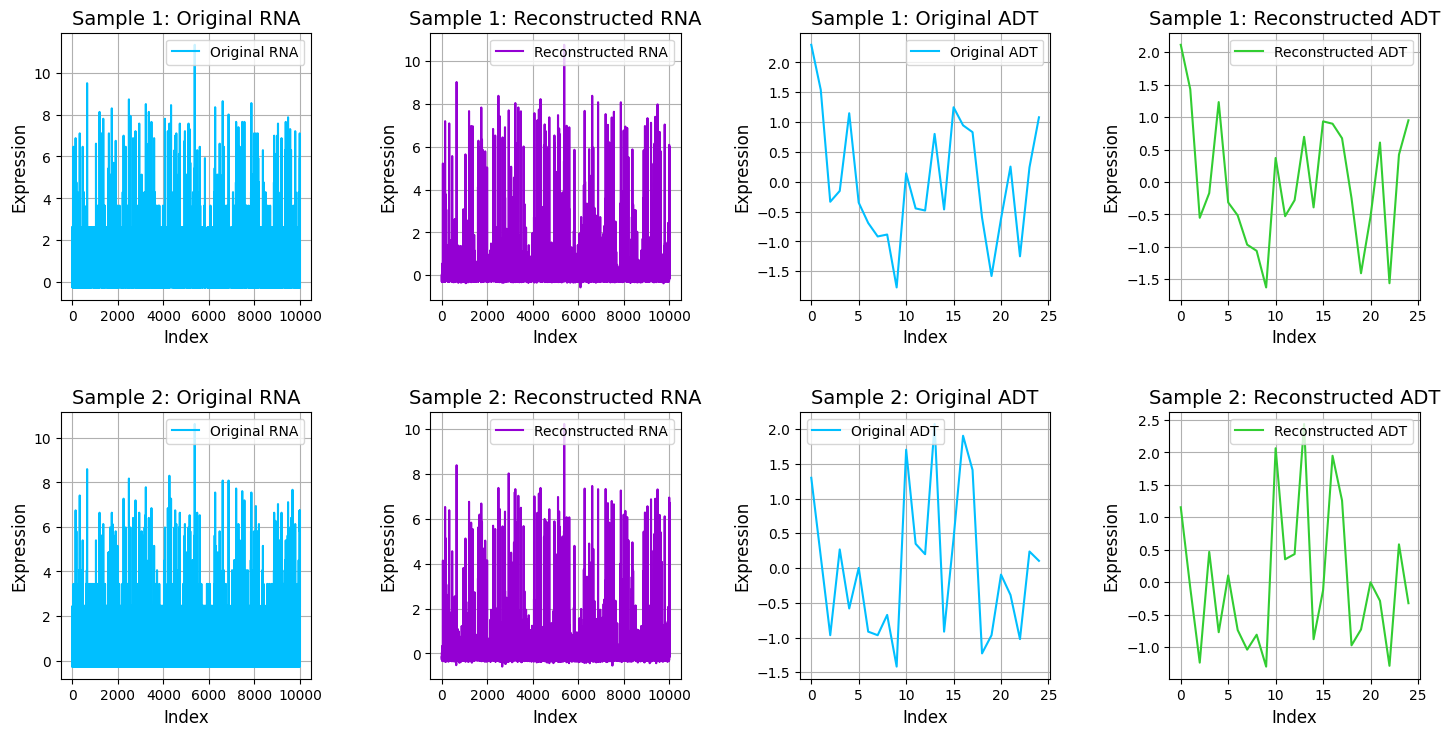

{0: [0.5016369223594666], 1: [0.46770238876342773], 2: [0.48007601499557495], 3: [0.4677360951900482], 4: [0.4695768654346466], 5: [0.43976473808288574], 6: [0.4854961931705475], 7: [0.4652152359485626], 8: [0.45370471477508545], 9: [0.45183417201042175]}


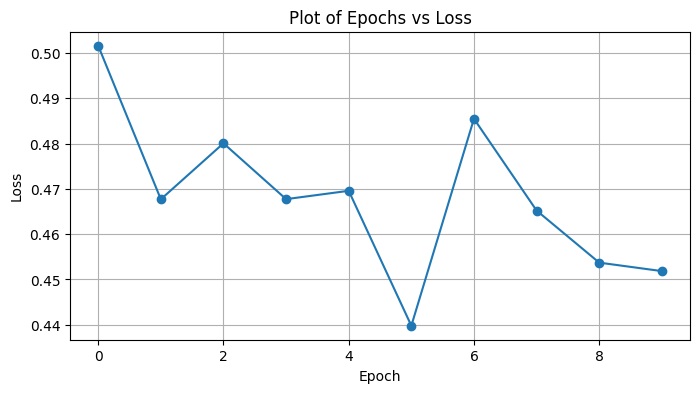

In [ ]:
optimizer = torch.optim.Adam(
    list(rna_encoder.parameters()) +
    list(adt_encoder.parameters()) +
    list(rna_decoder.parameters()) +
    list(adt_decoder.parameters()), lr=0.001)

def train(epoch):
    total_rna_corr = 0.0
    total_adt_corr = 0.0
    num_batches = 0
    losses = []

    for i, (rna_data, adt_data) in enumerate(train_loader):
        optimizer.zero_grad()

        # Encode RNA and ADT
        rna_mean, rna_log_var = rna_encoder(rna_data)
        adt_mean, adt_log_var = adt_encoder(adt_data)

        # Sample from the latent space using the reparameterization trick
        rna_std = torch.exp(0.5 * rna_log_var)
        adt_std = torch.exp(0.5 * adt_log_var)
        rna_z = rna_mean + rna_std * torch.randn_like(rna_std)
        adt_z = adt_mean + adt_std * torch.randn_like(adt_std)

        # Decode the latent space
        reconstructed_rna = rna_decoder(rna_z)
        reconstructed_adt = adt_decoder(adt_z)

        # Calculate losses
        rna_loss = nn.MSELoss()(reconstructed_rna, rna_data)
        adt_loss = nn.MSELoss()(reconstructed_adt, adt_data)
        loss = rna_loss + adt_loss
        loss.backward()
        optimizer.step()

        # Calculate Pearson correlation for RNA and ADT
        rna_corr, _ = pearsonr(reconstructed_rna.detach().cpu().numpy().flatten(), rna_data.cpu().numpy().flatten())
        adt_corr, _ = pearsonr(reconstructed_adt.detach().cpu().numpy().flatten(), adt_data.cpu().numpy().flatten())
        total_rna_corr += rna_corr
        total_adt_corr += adt_corr
        num_batches += 1

        if i % 200 == 0:
            losses.append(loss.item())
            print(f'Epoch {epoch}, Loss {loss.item()}')

    # Average correlation across all batches
    avg_rna_corr = total_rna_corr / num_batches
    avg_adt_corr = total_adt_corr / num_batches
    print(f'Average RNA Correlation: {avg_rna_corr:.2f}, Average ADT Correlation: {avg_adt_corr:.2f}')
    print(losses)

    n_samples = 2
    reconstructed_samples = reconstructed_rna
    fig, axes = plt.subplots(n_samples, 4, figsize=(15, 4 * n_samples))  # Adjust the figure size for three columns

    # Define colors for each plot
    original_color = 'deepskyblue'
    reconstructed_rna_color = 'darkviolet'
    reconstructed_adt_color = 'limegreen'

    for i in range(n_samples):
        # Plot original RNA data
        axes[i, 0].plot(rna_data[i], label='Original RNA', color=original_color)
        axes[i, 0].set_title(f'Sample {i+1}: Original RNA', fontsize=14)
        axes[i, 0].set_xlabel('Index', fontsize=12)
        axes[i, 0].set_ylabel('Expression', fontsize=12)
        axes[i, 0].legend()
        axes[i, 0].grid(True)

        # Plot reconstructed RNA data
        axes[i, 1].plot(reconstructed_samples.detach().numpy()[i], label='Reconstructed RNA', color=reconstructed_rna_color)
        axes[i, 1].set_title(f'Sample {i+1}: Reconstructed RNA', fontsize=14)
        axes[i, 1].set_xlabel('Index', fontsize=12)
        axes[i, 1].set_ylabel('Expression', fontsize=12)
        axes[i, 1].legend()
        axes[i, 1].grid(True)

        # Plot original ADT data
        axes[i, 2].plot(adt_data[i], label='Original ADT', color=original_color)
        axes[i, 2].set_title(f'Sample {i+1}: Original ADT', fontsize=14)
        axes[i, 2].set_xlabel('Index', fontsize=12)
        axes[i, 2].set_ylabel('Expression', fontsize=12)
        axes[i, 2].legend()
        axes[i, 2].grid(True)

        # Plot reconstructed ADT data
        axes[i, 3].plot(reconstructed_adt.detach().numpy()[i], label='Reconstructed ADT', color=reconstructed_adt_color)
        axes[i, 3].set_title(f'Sample {i+1}: Reconstructed ADT', fontsize=14)
        axes[i, 3].set_xlabel('Index', fontsize=12)
        axes[i, 3].set_ylabel('Expression', fontsize=12)
        axes[i, 3].legend()
        axes[i, 3].grid(True)

    plt.tight_layout(pad=3.0)  # Adjust layout to prevent overlap
    plt.show()

    return losses

# Training the model
num_epochs = 10
final_dict=dict()
for epoch in range(num_epochs):
    losess=train(epoch)
    final_dict[epoch]=losess


print(final_dict)
# Plotting loss
# Extracting keys and values for plotting
x = list(final_dict.keys())
y = [value[0] for value in final_dict.values()]

# Creating the plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Plot of Epochs vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
cc=CommonClass()
predicted_adt=cc.predict_adt(test_rna)

tensor([[ 1.1669,  0.6636,  1.4601,  ..., -0.8217,  0.7795,  0.1832],
        [ 1.8866, -0.2829,  1.3656,  ..., -1.9185,  1.1337,  0.7332],
        [ 1.5220,  0.1186, -0.4469,  ..., -1.4913,  0.9158,  0.0967],
        ...,
        [ 1.6007, -0.3253,  1.7192,  ..., -2.2566,  1.4887,  0.6087],
        [ 1.4718, -0.3890,  1.7813,  ..., -1.9250,  1.1803,  0.4146],
        [ 1.2378, -0.3109, -1.0416,  ..., -1.2949,  0.9690, -0.2282]])

In [ ]:
cc.finalCSVWritting(predicted_adt)

The integration of Batch normalization and LeakyReLU in training has produced excellent results. Loss values are consistently low, ranging from about 0.39 to 0.44 across epochs, indicating effective learning. RNA correlation remains strong, with values fluctuating slightly around 0.77 to 0.79. ADT correlation is particularly impressive, achieving near-perfect scores close to 1.00 in several epochs and we got kaggle score of with kaggle score 0.72. These results suggest that the model adjustments have greatly enhanced predictive accuracy and stability in processing data.

**Conclusion:**

Beginning with a fundamental variational autoencoder approach, through successive improvements, the model's performance improved significantly across various configurations. Initial training results showed high losses and negative correlations and also there is no positive in corelattion values and got some random kaggle score 0.39, indicating poor model efficacy. Introduction of the Adam optimizer dramatically improved both loss reduction and correlation metrics, demonstrating enhanced learning capabilities and with this we got Kaggle score of 0.49. Subsequent incorporation of Batch normalization and LeakyReLU further optimized the model, leading to even lower loss values and near-perfect ADT correlations. These modifications not only stabilized the model but also maximized its predictive accuracy with kaggle score 0.72
